In [2]:
%matplotlib notebook
from copy import deepcopy as copy
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import scipy.io as sio
import pandas as pd
from tqdm import tqdm
import pickle
from collections import OrderedDict
import os
from scipy.ndimage.interpolation import shift
from functools import reduce
import time

from aux import Generic
from disp import set_font_size, get_spaced_colors
from ntwk import LIFNtwkG
from utils.general import *
from utils.file_io import *

In [3]:
def col_in_used(col, used, all_chains):
    if col in used:
        for c_idx, chain in enumerate(all_chains):
            if len(chain) > 0 and col == chain[0]:
                chain.insert(0, col)
            used.append(col)
        return True
    return False
    
def process_col(col, max_locs, curr_chain, all_chains, used):
    receiving = max_locs[col]
    if receiving != -1:
        col_in_used(receiving, used, all_chains)
        curr_chain.append(receiving)
        used.append(receiving)
        process_col(receiving, max_locs, curr_chain, all_chains, used)
    
def sort_mat(mat, min_val):
    thresholded = mat > min_val
    locs_per_col = [np.nonzero(thresholded[:, i])[0].tolist() for i in range(thresholded.shape[1])]
    
    print(locs_per_col)
    
    used = []
    all_chains = []
    
    for col in range(mat.shape[1]):
        if not col_in_used(col, used, all_chains):
            curr_chain = [col]
            all_chains.append(curr_chain)
            process_col(col, max_locs_per_col, curr_chain, all_chains, used)
    
    all_chains_pruned = []
    for chain in all_chains:
        if len(chain) > 1:
            all_chains_pruned.append(chain)
    return all_chains_pruned

In [4]:
def graph_weight_matrix(mat, title, v_max=None, ax=None):
    ax.clear()
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(4, 4), tight_layout=True)
    ax.matshow(mat, vmin=0, vmax=v_max if v_max is not None else mat.max(), cmap='gray')
    ax.set_title(title)
    set_font_size(ax, 14)

<IPython.core.display.Javascript object>


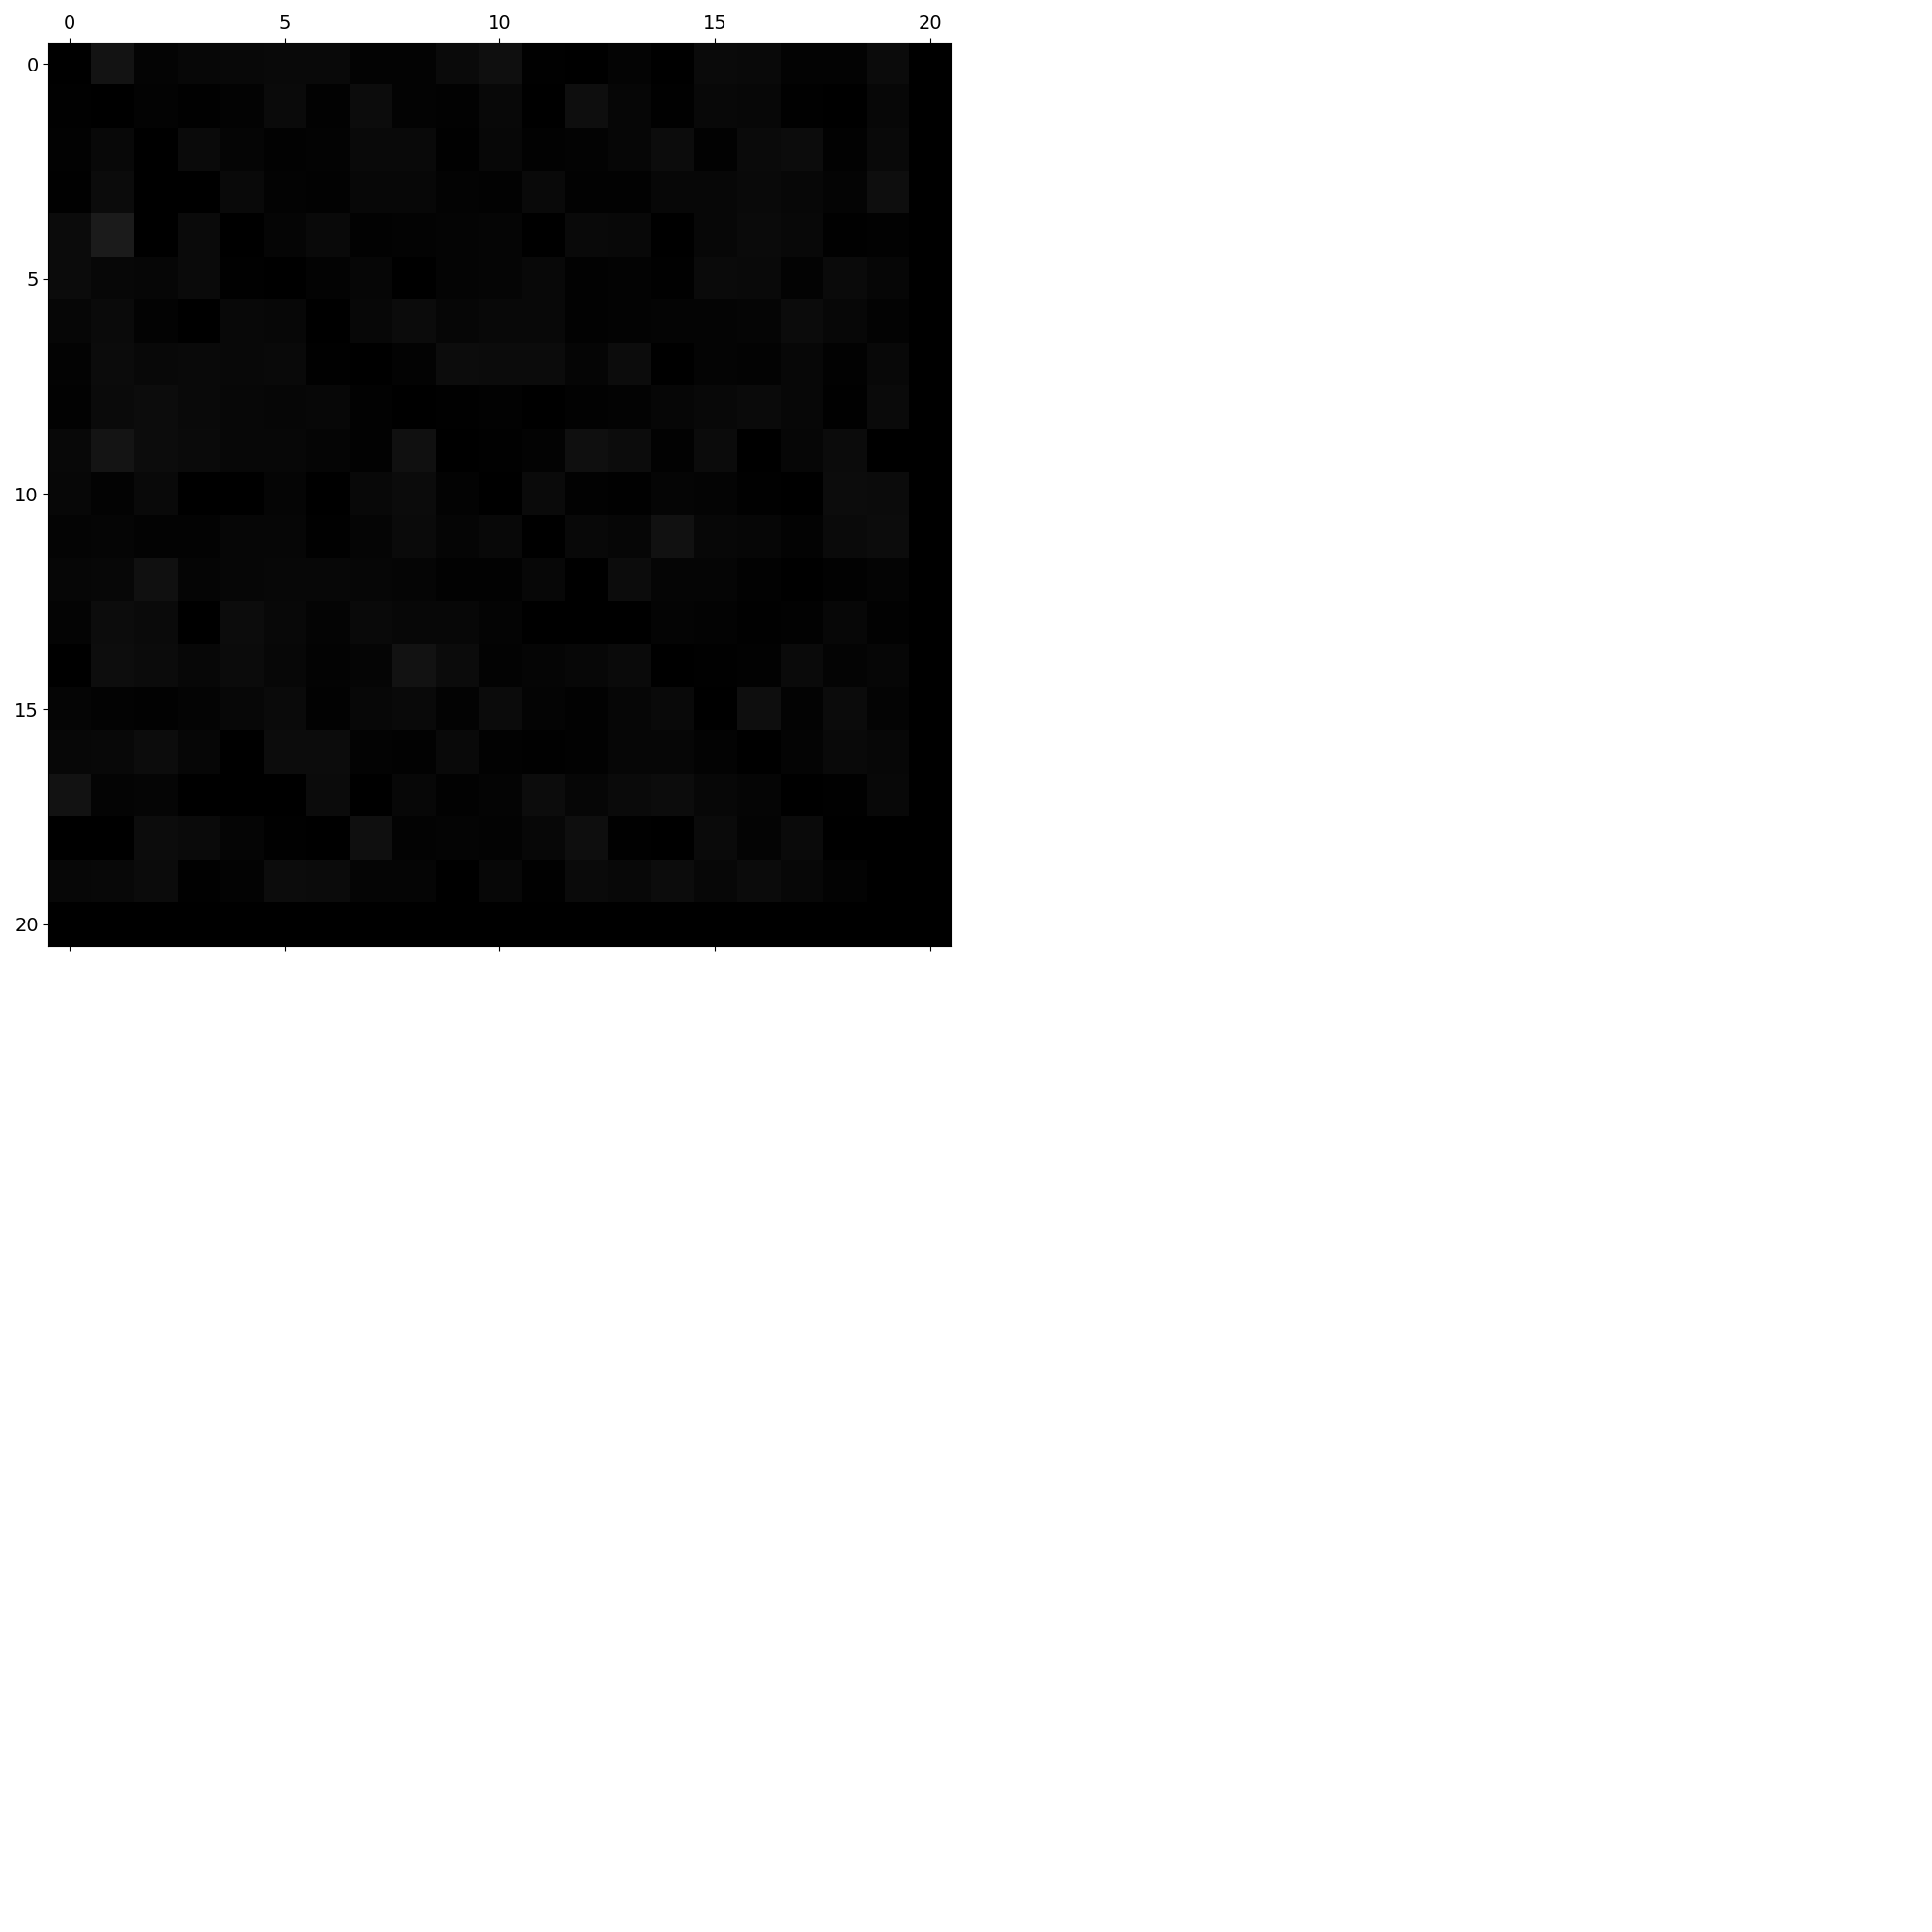

KeyboardInterrupt: 

In [55]:
'single'
direc = './data/2020-11-03--13:37 single eta 1e-5 eps 1e-2'
file_names = sorted(all_files_from_dir(direc))
plt.ion()
fig, ax = plt.subplots(1, 1, figsize=(10, 10), tight_layout=True)

for i_f in range(0, len(file_names), 10):
    file = file_names[i_f]
    loaded = sio.loadmat(os.path.join(direc, file))
    graph_weight_matrix(loaded['w_r_e'], '', ax=ax, v_max=0.14*0.004*0.4)
    fig.canvas.draw()
    time.sleep(0.000001)

In [ ]:
'single'
direc = './data/2020-11-03--14:25'
file_names = sorted(all_files_from_dir(direc))
plt.ion()
fig, ax = plt.subplots(1, 1, figsize=(10, 10), tight_layout=True)

for i_f in range(0, len(file_names), 30):
    file = file_names[i_f]
    loaded = sio.loadmat(os.path.join(direc, file))
    graph_weight_matrix(loaded['w_r_e'], '', ax=ax, v_max=0.14*0.004*0.4)
    fig.canvas.draw()
    time.sleep(0.000001)

In [ ]:
'wide'
direc = './data/2020-11-03--14:24'
file_names = sorted(all_files_from_dir(direc))
plt.ion()
fig, ax = plt.subplots(1, 1, figsize=(10, 10), tight_layout=True)

for i_f in range(0, len(file_names), 30):
    file = file_names[i_f]
    loaded = sio.loadmat(os.path.join(direc, file))
    graph_weight_matrix(loaded['w_r_e'], '', ax=ax, v_max=0.26*0.004 *0.4 /4)
    fig.canvas.draw()
    time.sleep(0.000001)

# plt.ioff()
# fig, ax = plt.subplots(1, 1, figsize=(10, 10), tight_layout=True)
# file = file_names[-1]
# loaded = sio.loadmat(os.path.join(direc, file))
# graph_weight_matrix(loaded['w_r_e'], '', ax=ax, v_max=0.26*0.004 *0.4 /4)
# fig.show()

In [ ]:
'wide'
direc = './data/2020-11-03--13:36'
file_names = sorted(all_files_from_dir(direc))
plt.ion()
fig, ax = plt.subplots(1, 1, figsize=(10, 10), tight_layout=True)

for i_f in range(0, len(file_names), 10):
    file = file_names[i_f]
    loaded = sio.loadmat(os.path.join(direc, file))
    graph_weight_matrix(loaded['w_r_e'], '', ax=ax, v_max=0.26*0.004 *0.4 /4)
    fig.canvas.draw()
    time.sleep(0.000001)

In [ ]:
'single'
direc = './data/2020-11-03--15:18'
file_names = sorted(all_files_from_dir(direc))
plt.ion()
fig, ax = plt.subplots(1, 1, figsize=(10, 10), tight_layout=True)

for i_f in range(0, len(file_names)):
    file = file_names[i_f]
    loaded = sio.loadmat(os.path.join(direc, file))
    graph_weight_matrix(loaded['w_r_e'], '', ax=ax, v_max=0.14*0.004*0.4)
    fig.canvas.draw()
    time.sleep(0.000001)

In [ ]:
'wide'
direc = './data/2020-11-03--15:20'
file_names = sorted(all_files_from_dir(direc))
plt.ion()
fig, ax = plt.subplots(1, 1, figsize=(10, 10), tight_layout=True)
set_font_size(ax, 14)

for i_f in range(0, len(file_names), 10):
    file = file_names[i_f]
    loaded = sio.loadmat(os.path.join(direc, file))
    graph_weight_matrix(loaded['w_r_e'], '', ax=ax, v_max=0.26*0.004 *0.4 /3)
    fig.canvas.draw()
    time.sleep(0.000001)

In [ ]:
'single'
direc = './data/2020-11-03--17:14'
file_names = sorted(all_files_from_dir(direc))
plt.ion()
fig, ax = plt.subplots(1, 1, figsize=(10, 10), tight_layout=True)

for i_f in range(0, len(file_names)):
    file = file_names[i_f]
    loaded = sio.loadmat(os.path.join(direc, file))
    graph_weight_matrix(loaded['w_r_e'], '', ax=ax, v_max=0.14*0.004*0.4)
    fig.canvas.draw()
    time.sleep(0.000001)

In [ ]:
'wide'
direc = './data/2020-11-03--17:30'
file_names = sorted(all_files_from_dir(direc))
plt.ion()
fig, ax = plt.subplots(1, 1, figsize=(10, 10), tight_layout=True)

for i_f in range(0, len(file_names)):
    file = file_names[i_f]
    loaded = sio.loadmat(os.path.join(direc, file))
    graph_weight_matrix(loaded['w_r_e'], '', ax=ax, v_max=0.26*0.004 *0.4 /3)
    fig.canvas.draw()
    time.sleep(0.000001)

In [ ]:
'single'
direc = './data/2020-11-04--10:20'
file_names = sorted(all_files_from_dir(direc))
plt.ion()
fig, ax = plt.subplots(1, 1, figsize=(10, 10), tight_layout=True)

for i_f in range(0, len(file_names)):
    file = file_names[i_f]
    loaded = sio.loadmat(os.path.join(direc, file))
    graph_weight_matrix(loaded['w_r_e'], '', ax=ax, v_max=0.14*0.004*0.4)
    fig.canvas.draw()
    time.sleep(0.000001)

In [ ]:
'single -- high res -- small learning rate'
direc = './data/2020-11-04--10:32'
file_names = sorted(all_files_from_dir(direc))
plt.ion()
fig, ax = plt.subplots(1, 1, figsize=(10, 10), tight_layout=True)

for i_f in range(0, len(file_names)):
    file = file_names[i_f]
    loaded = sio.loadmat(os.path.join(direc, file))
    graph_weight_matrix(loaded['w_r_e'], '', ax=ax, v_max=0.14*0.004*0.4)
    fig.canvas.draw()
    time.sleep(0.000001)

In [ ]:
'wide'
direc = './data/2020-11-04--10:37'
file_names = sorted(all_files_from_dir(direc))
plt.ion()
fig, ax = plt.subplots(1, 1, figsize=(10, 10), tight_layout=True)

for i_f in range(0, len(file_names)):
    file = file_names[i_f]
    loaded = sio.loadmat(os.path.join(direc, file))
    graph_weight_matrix(loaded['w_r_e'], '', ax=ax, v_max=0.26*0.004 *0.4 /3)
    fig.canvas.draw()
    time.sleep(0.000001)
time.sleep(30)

<IPython.core.display.Javascript object>


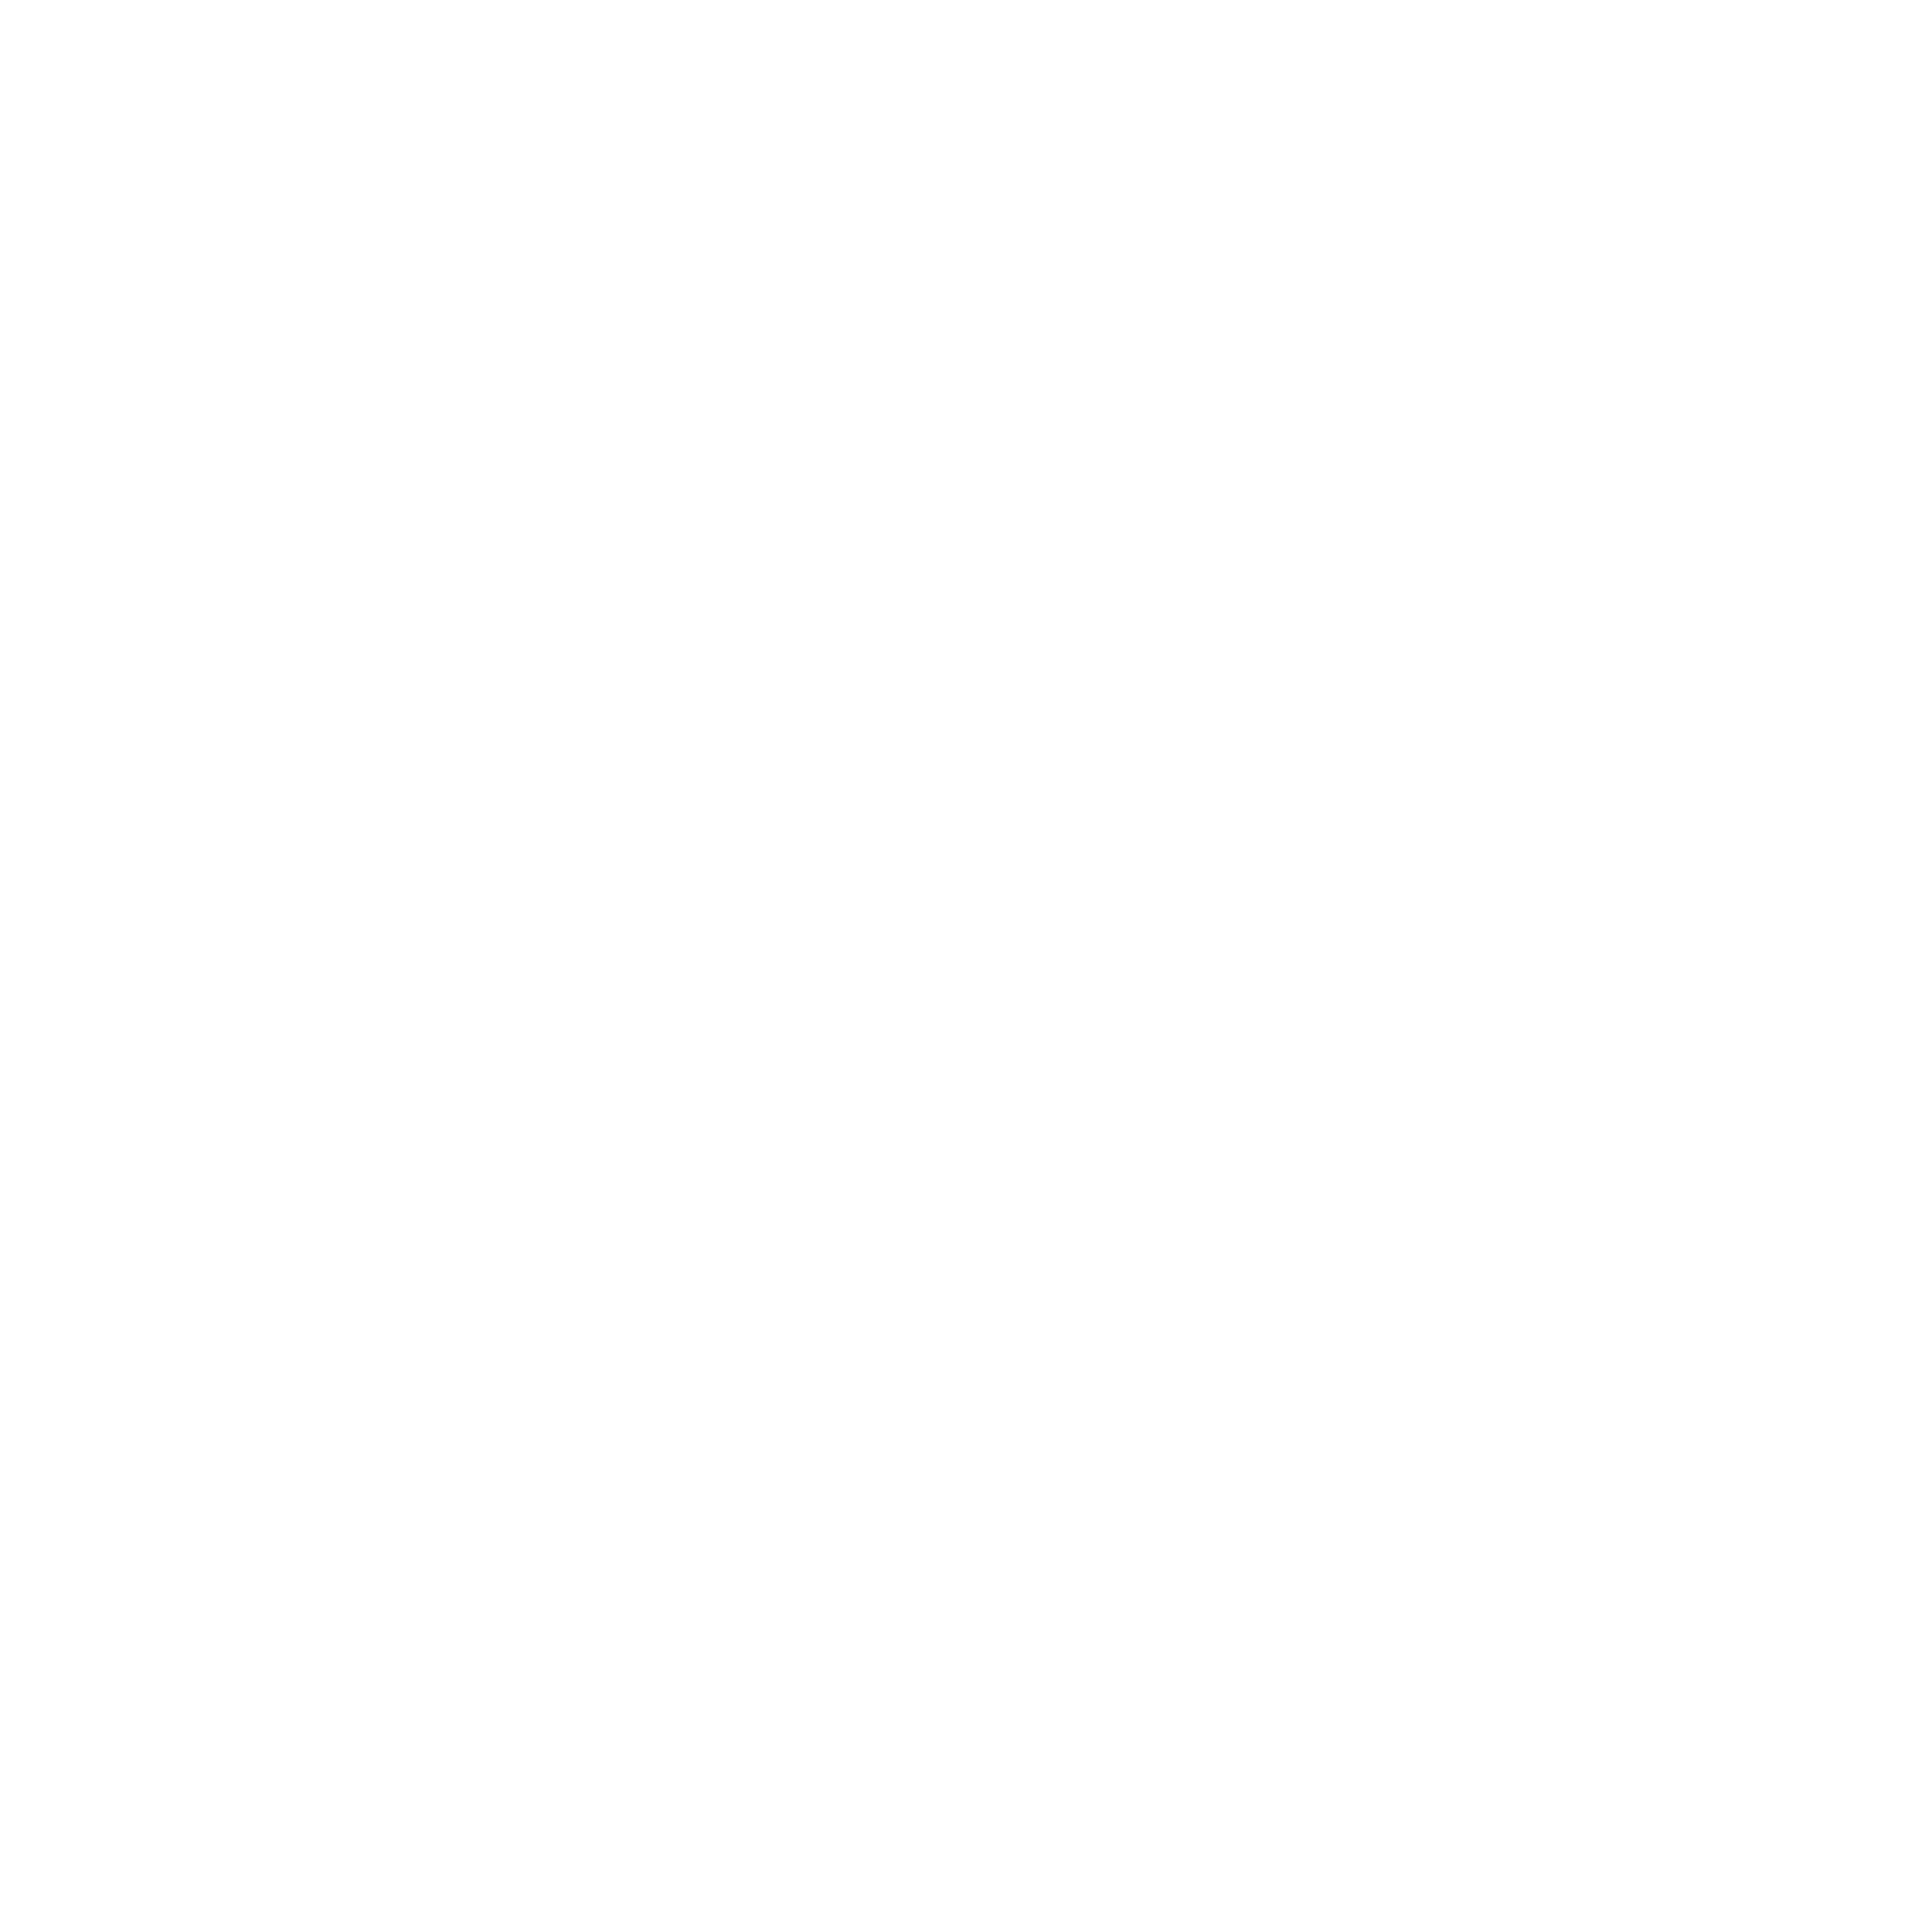

KeyboardInterrupt: 

In [21]:
'wide'
direc = './data/2020-11-04--10:47'
file_names = sorted(all_files_from_dir(direc))
plt.ion()
fig, ax = plt.subplots(1, 1, figsize=(10, 10), tight_layout=True)

for i_f in range(0, len(file_names)):
    file = file_names[i_f]
    loaded = sio.loadmat(os.path.join(direc, file))
    graph_weight_matrix(loaded['w_r_e'], '', ax=ax, v_max=0.26*0.004 *0.4 / 2)
    fig.canvas.draw()
    time.sleep(0.000001)
time.sleep(30)

<IPython.core.display.Javascript object>


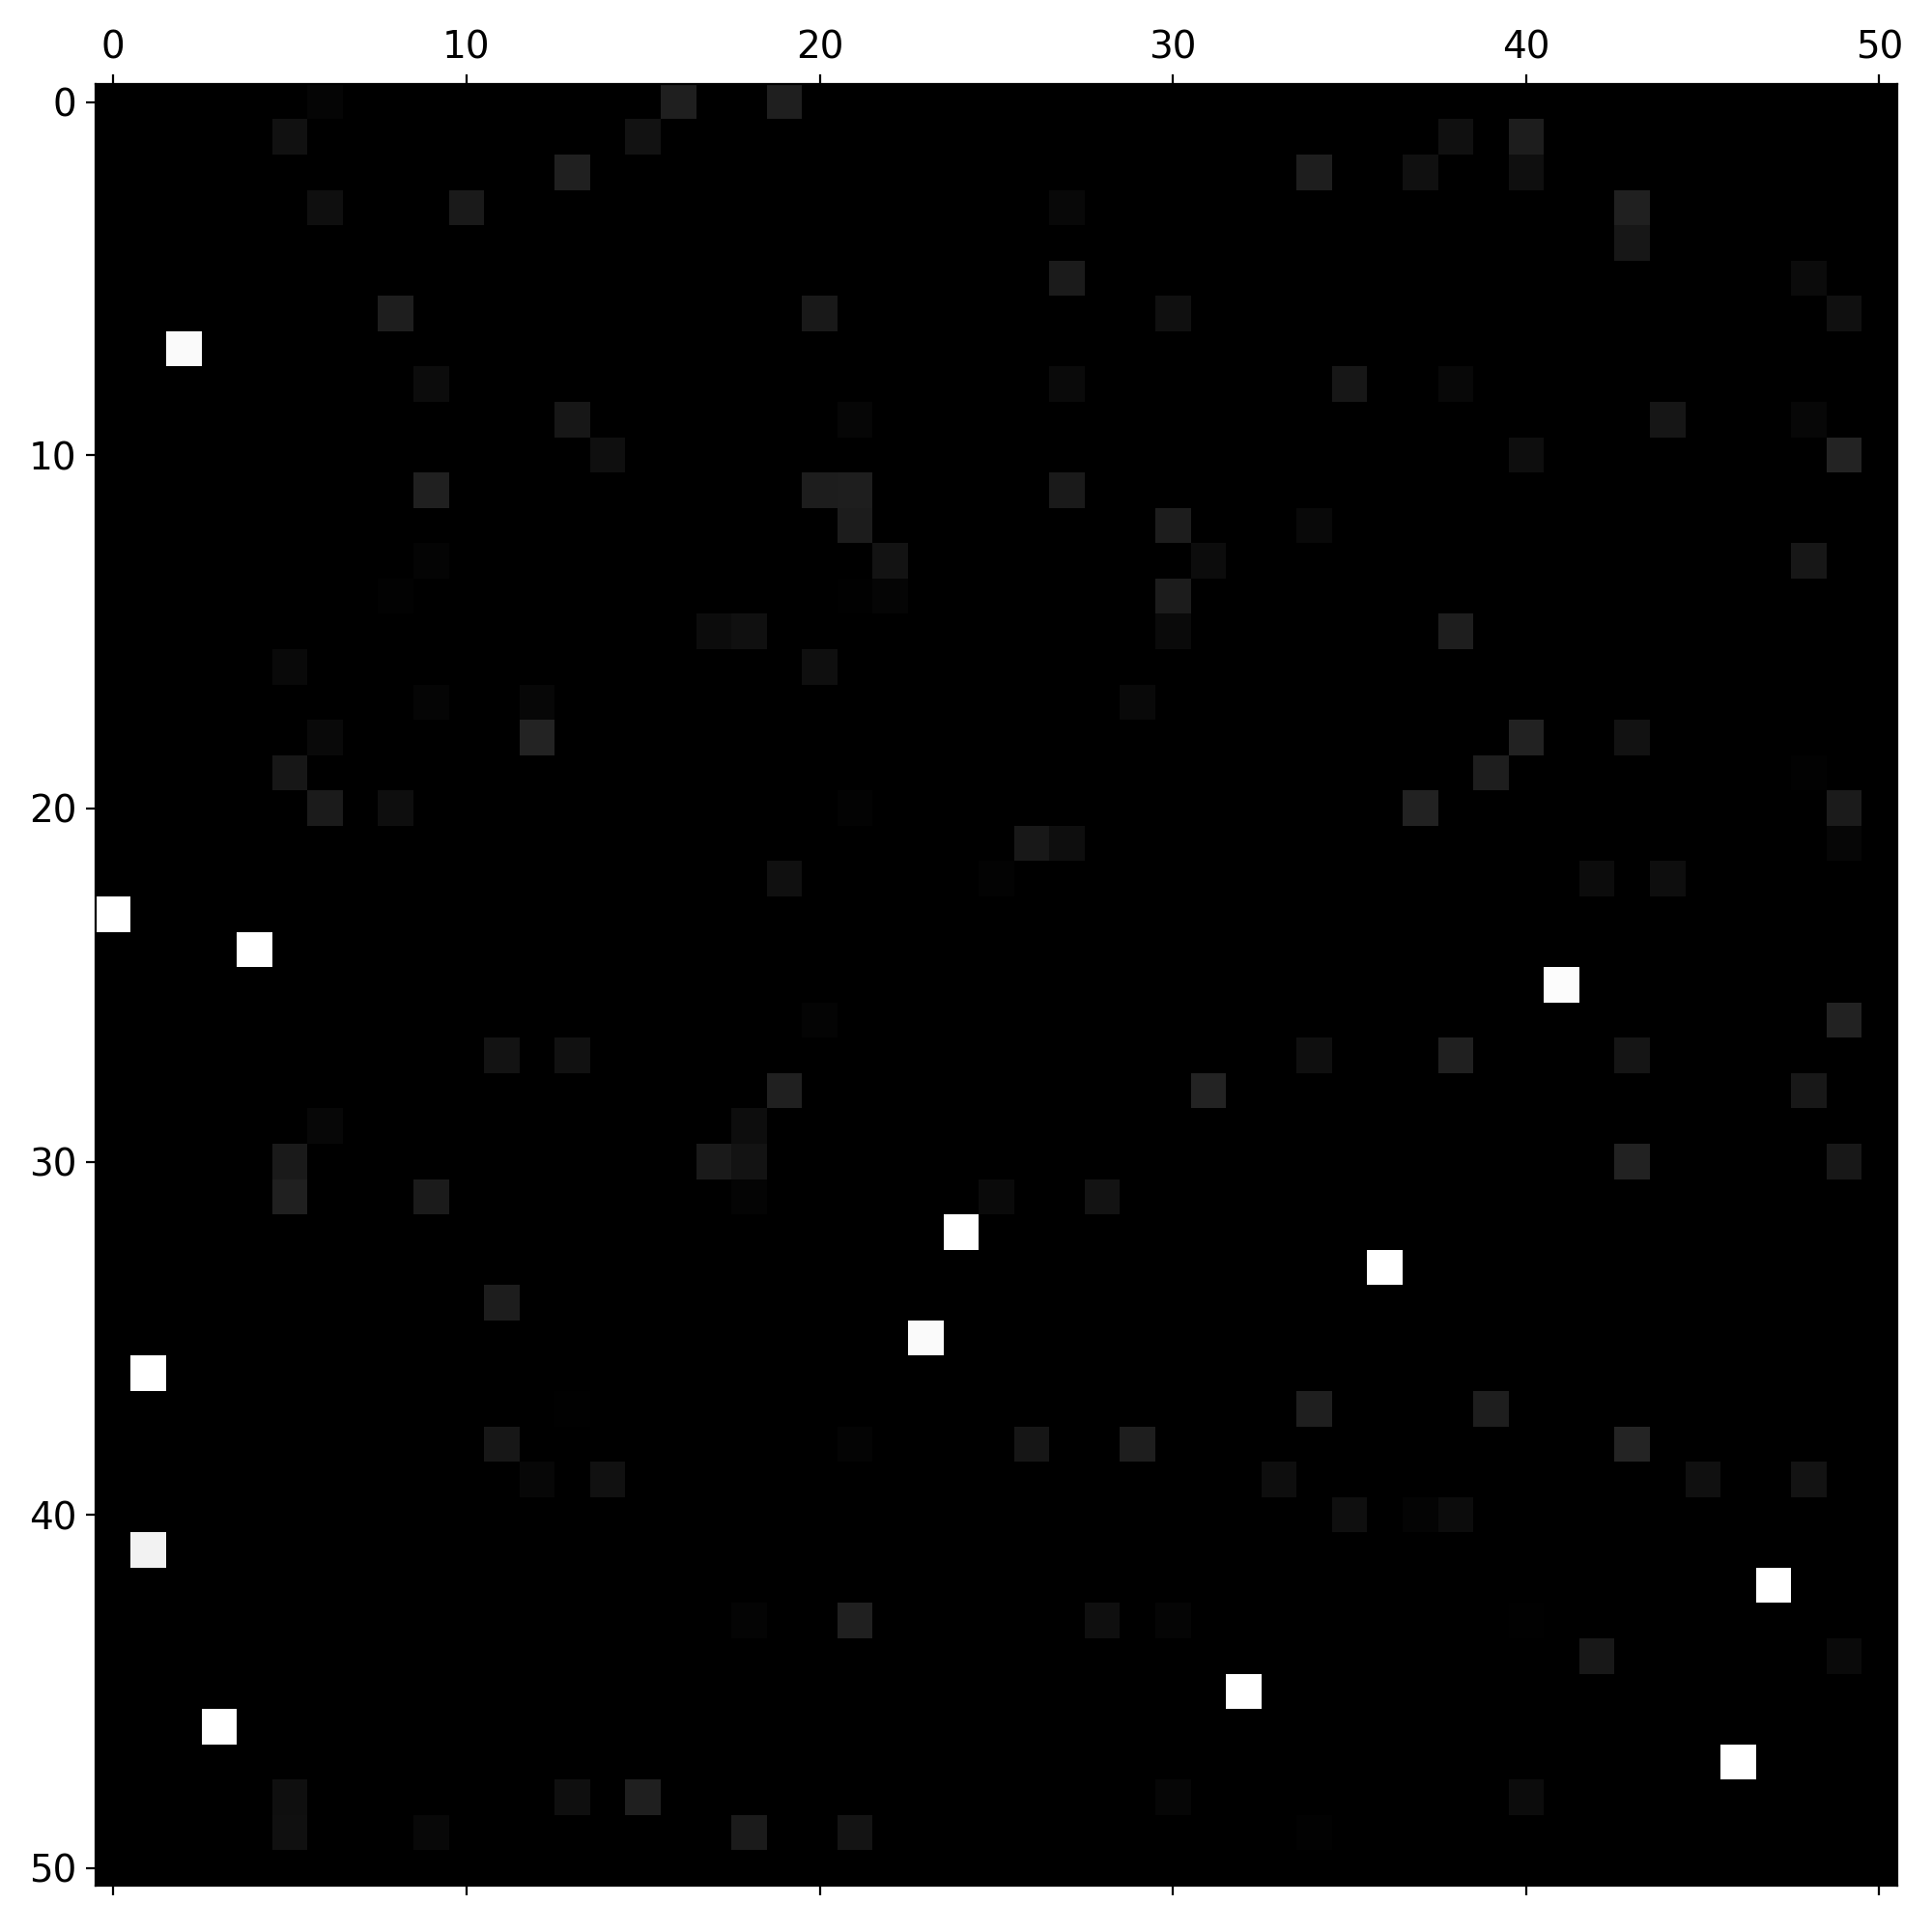

[13  7 -1 23 33 28 -1  5 -1 -1  6 -1 -1 -1 45 36 -1 -1 -1 41 -1 -1 -1 -1
 -1 -1 -1 19 27 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 11 -1 -1 30 -1 44 -1
 -1 -1 -1]


[[0, 13],
 [1, 7, 5, 28, 27, 19, 41, 11],
 [3, 23],
 [4, 33],
 [10, 6],
 [14, 45],
 [15, 36],
 [30, 30],
 [44, 30],
 [46, 44]]

In [43]:
'wide'
direc = './data/2020-11-04--19:16'
file_names = sorted(all_files_from_dir(direc))
plt.ion()
fig, ax = plt.subplots(1, 1, figsize=(10, 10), tight_layout=True)

for i_f in range(0, len(file_names), 3):
    file = file_names[i_f]
    loaded = sio.loadmat(os.path.join(direc, file))
    graph_weight_matrix(loaded['w_r_e'], '', ax=ax, v_max=0.26*0.004 *0.4 / 2)
    fig.canvas.draw()
    time.sleep(0.000001)
    
    if i_f == len(file_names) - 1:
        w_r = loaded['w_r_e']
        
sort_mat(w_r, 0.26*0.004 *0.4 / 2 * 0.5)


In [ ]:
sort_mat(w_r, 0.26*0.004 *0.4 / 2 * 0.5)

<IPython.core.display.Javascript object>


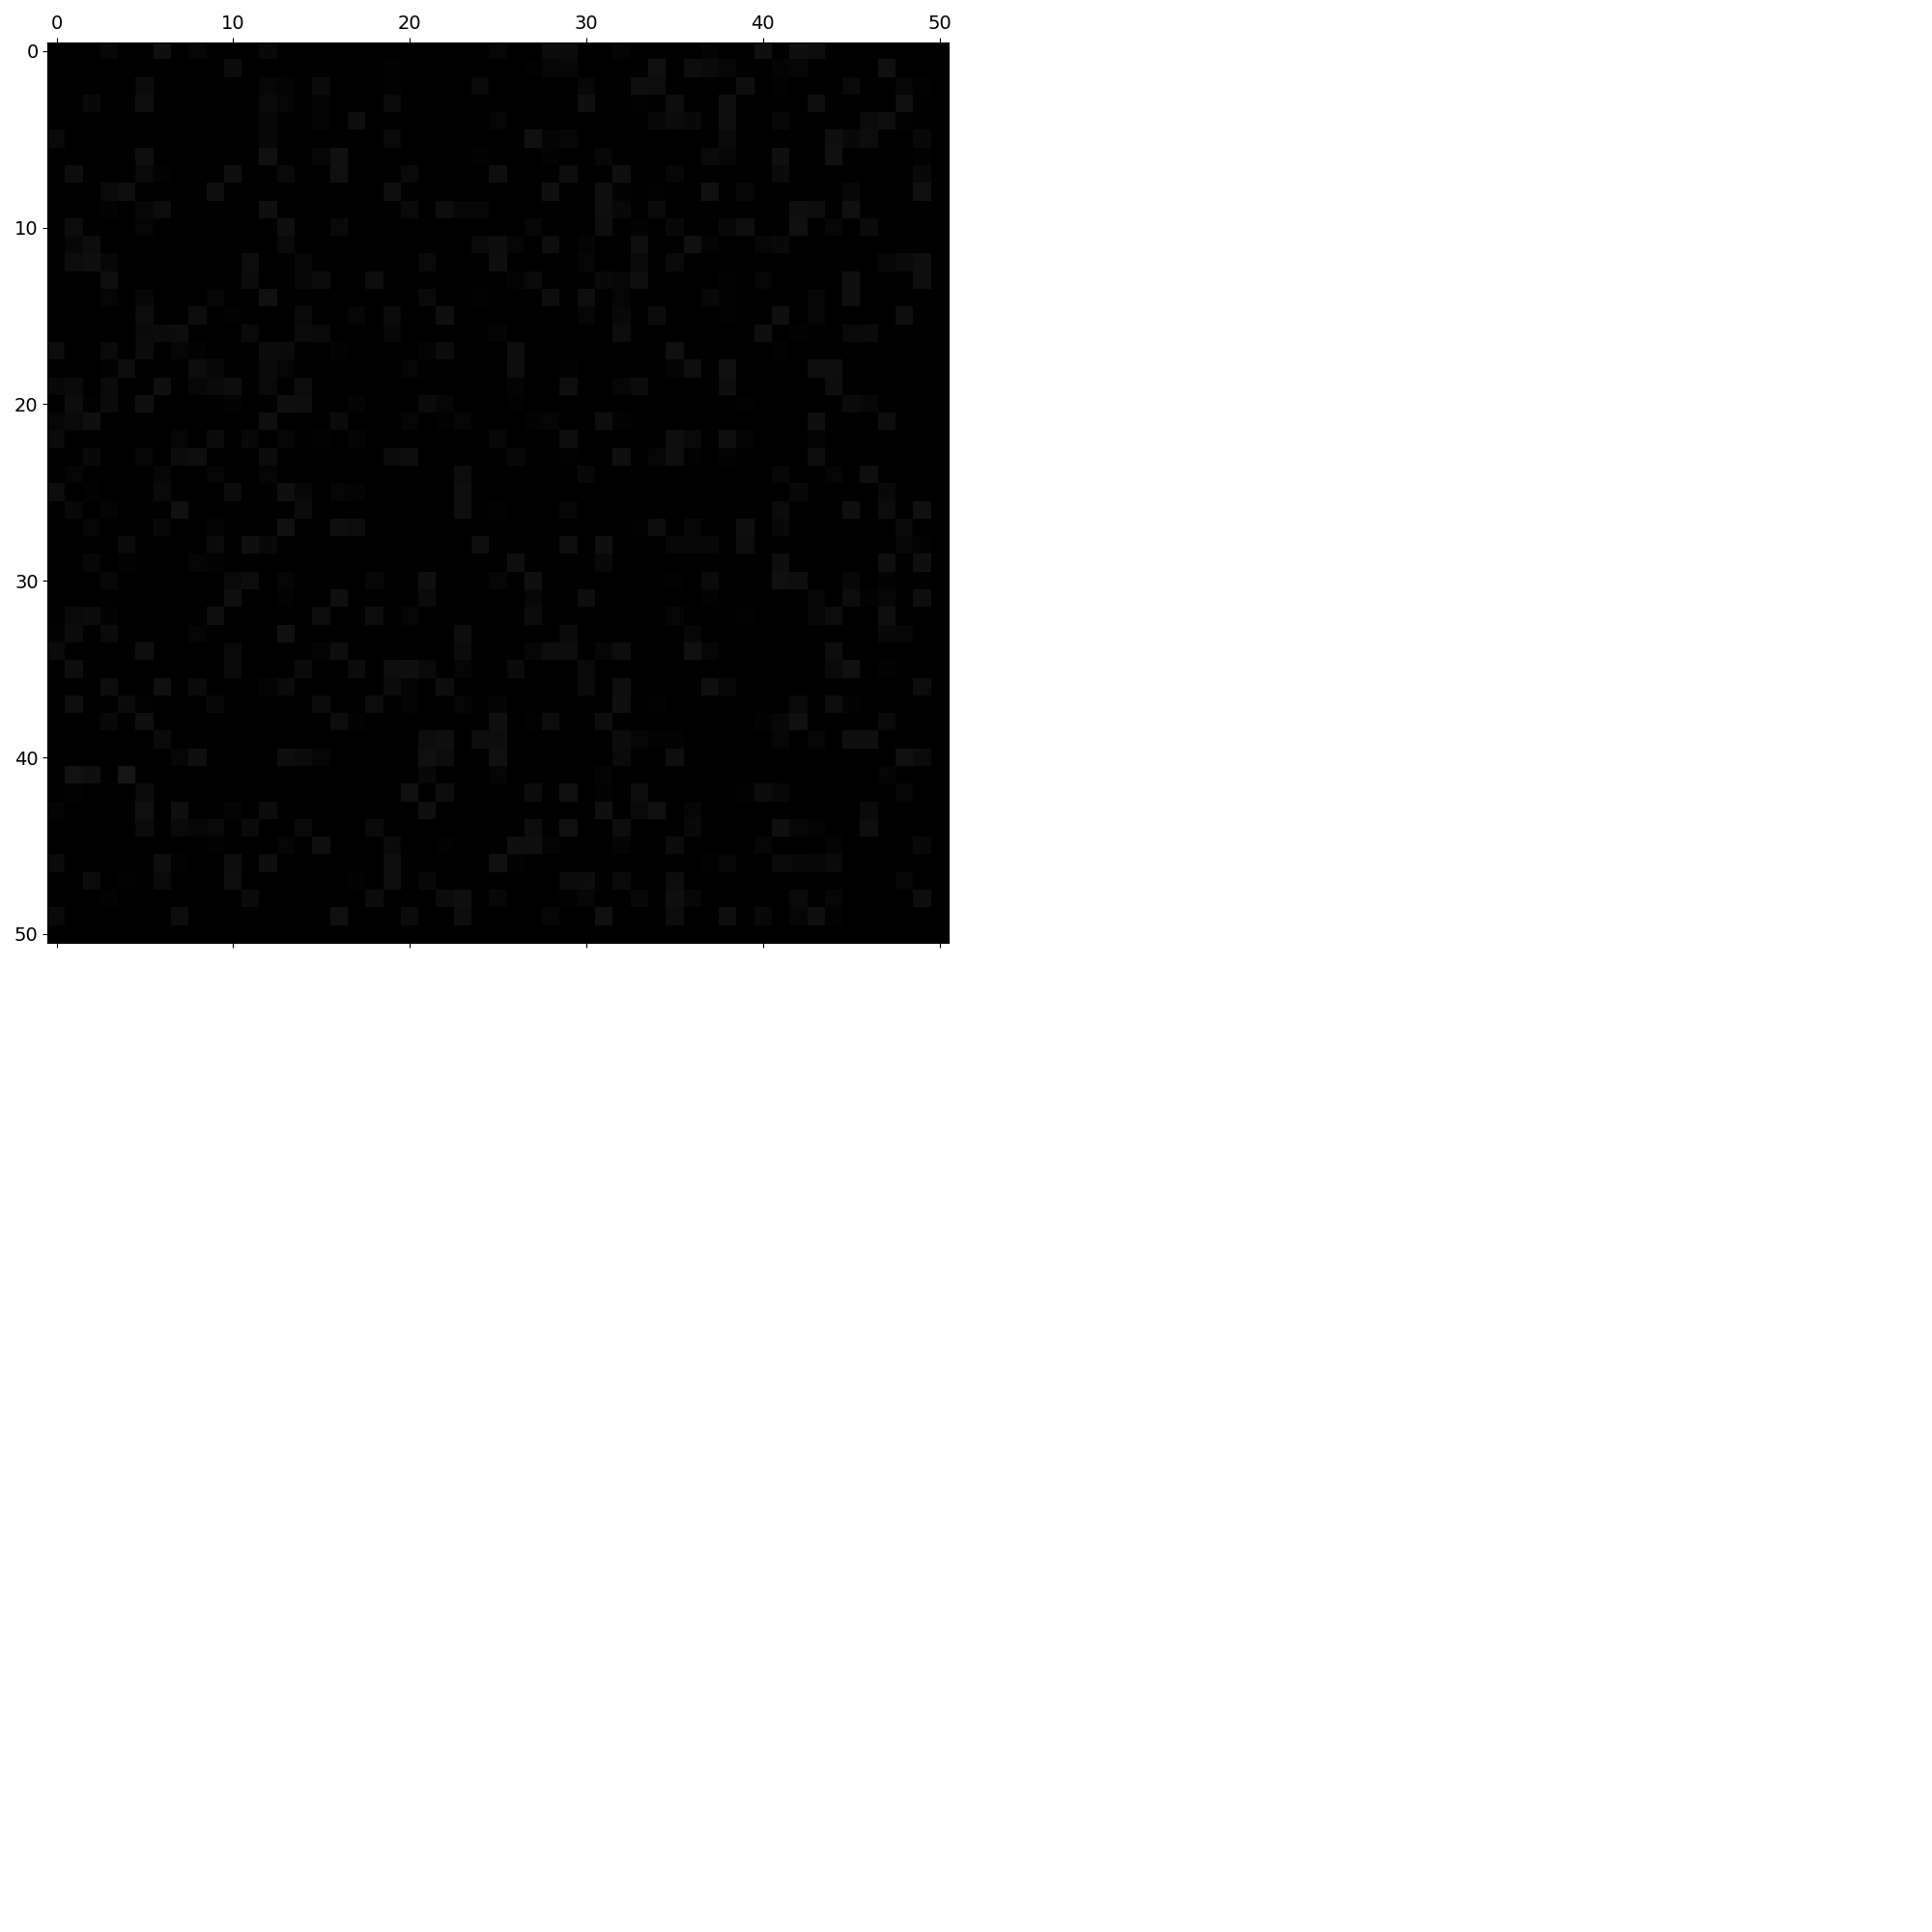

KeyboardInterrupt: 

In [38]:
'wide'
direc = './data/2020-11-04--19:23'
file_names = sorted(all_files_from_dir(direc))
plt.ion()
fig, ax = plt.subplots(1, 1, figsize=(10, 10), tight_layout=True)

for i_f in range(0, len(file_names)):
    file = file_names[i_f]
    loaded = sio.loadmat(os.path.join(direc, file))
    graph_weight_matrix(loaded['w_r_e'], '', ax=ax, v_max=0.26*0.004 / 5)
    fig.canvas.draw()
    time.sleep(0.000001)
    
    if i_f == len(file_names) - 1:
        w_r = loaded['w_r_e']
        
sort_mat(w_r, 0.26*0.004 / 5 * 0.5)

<IPython.core.display.Javascript object>


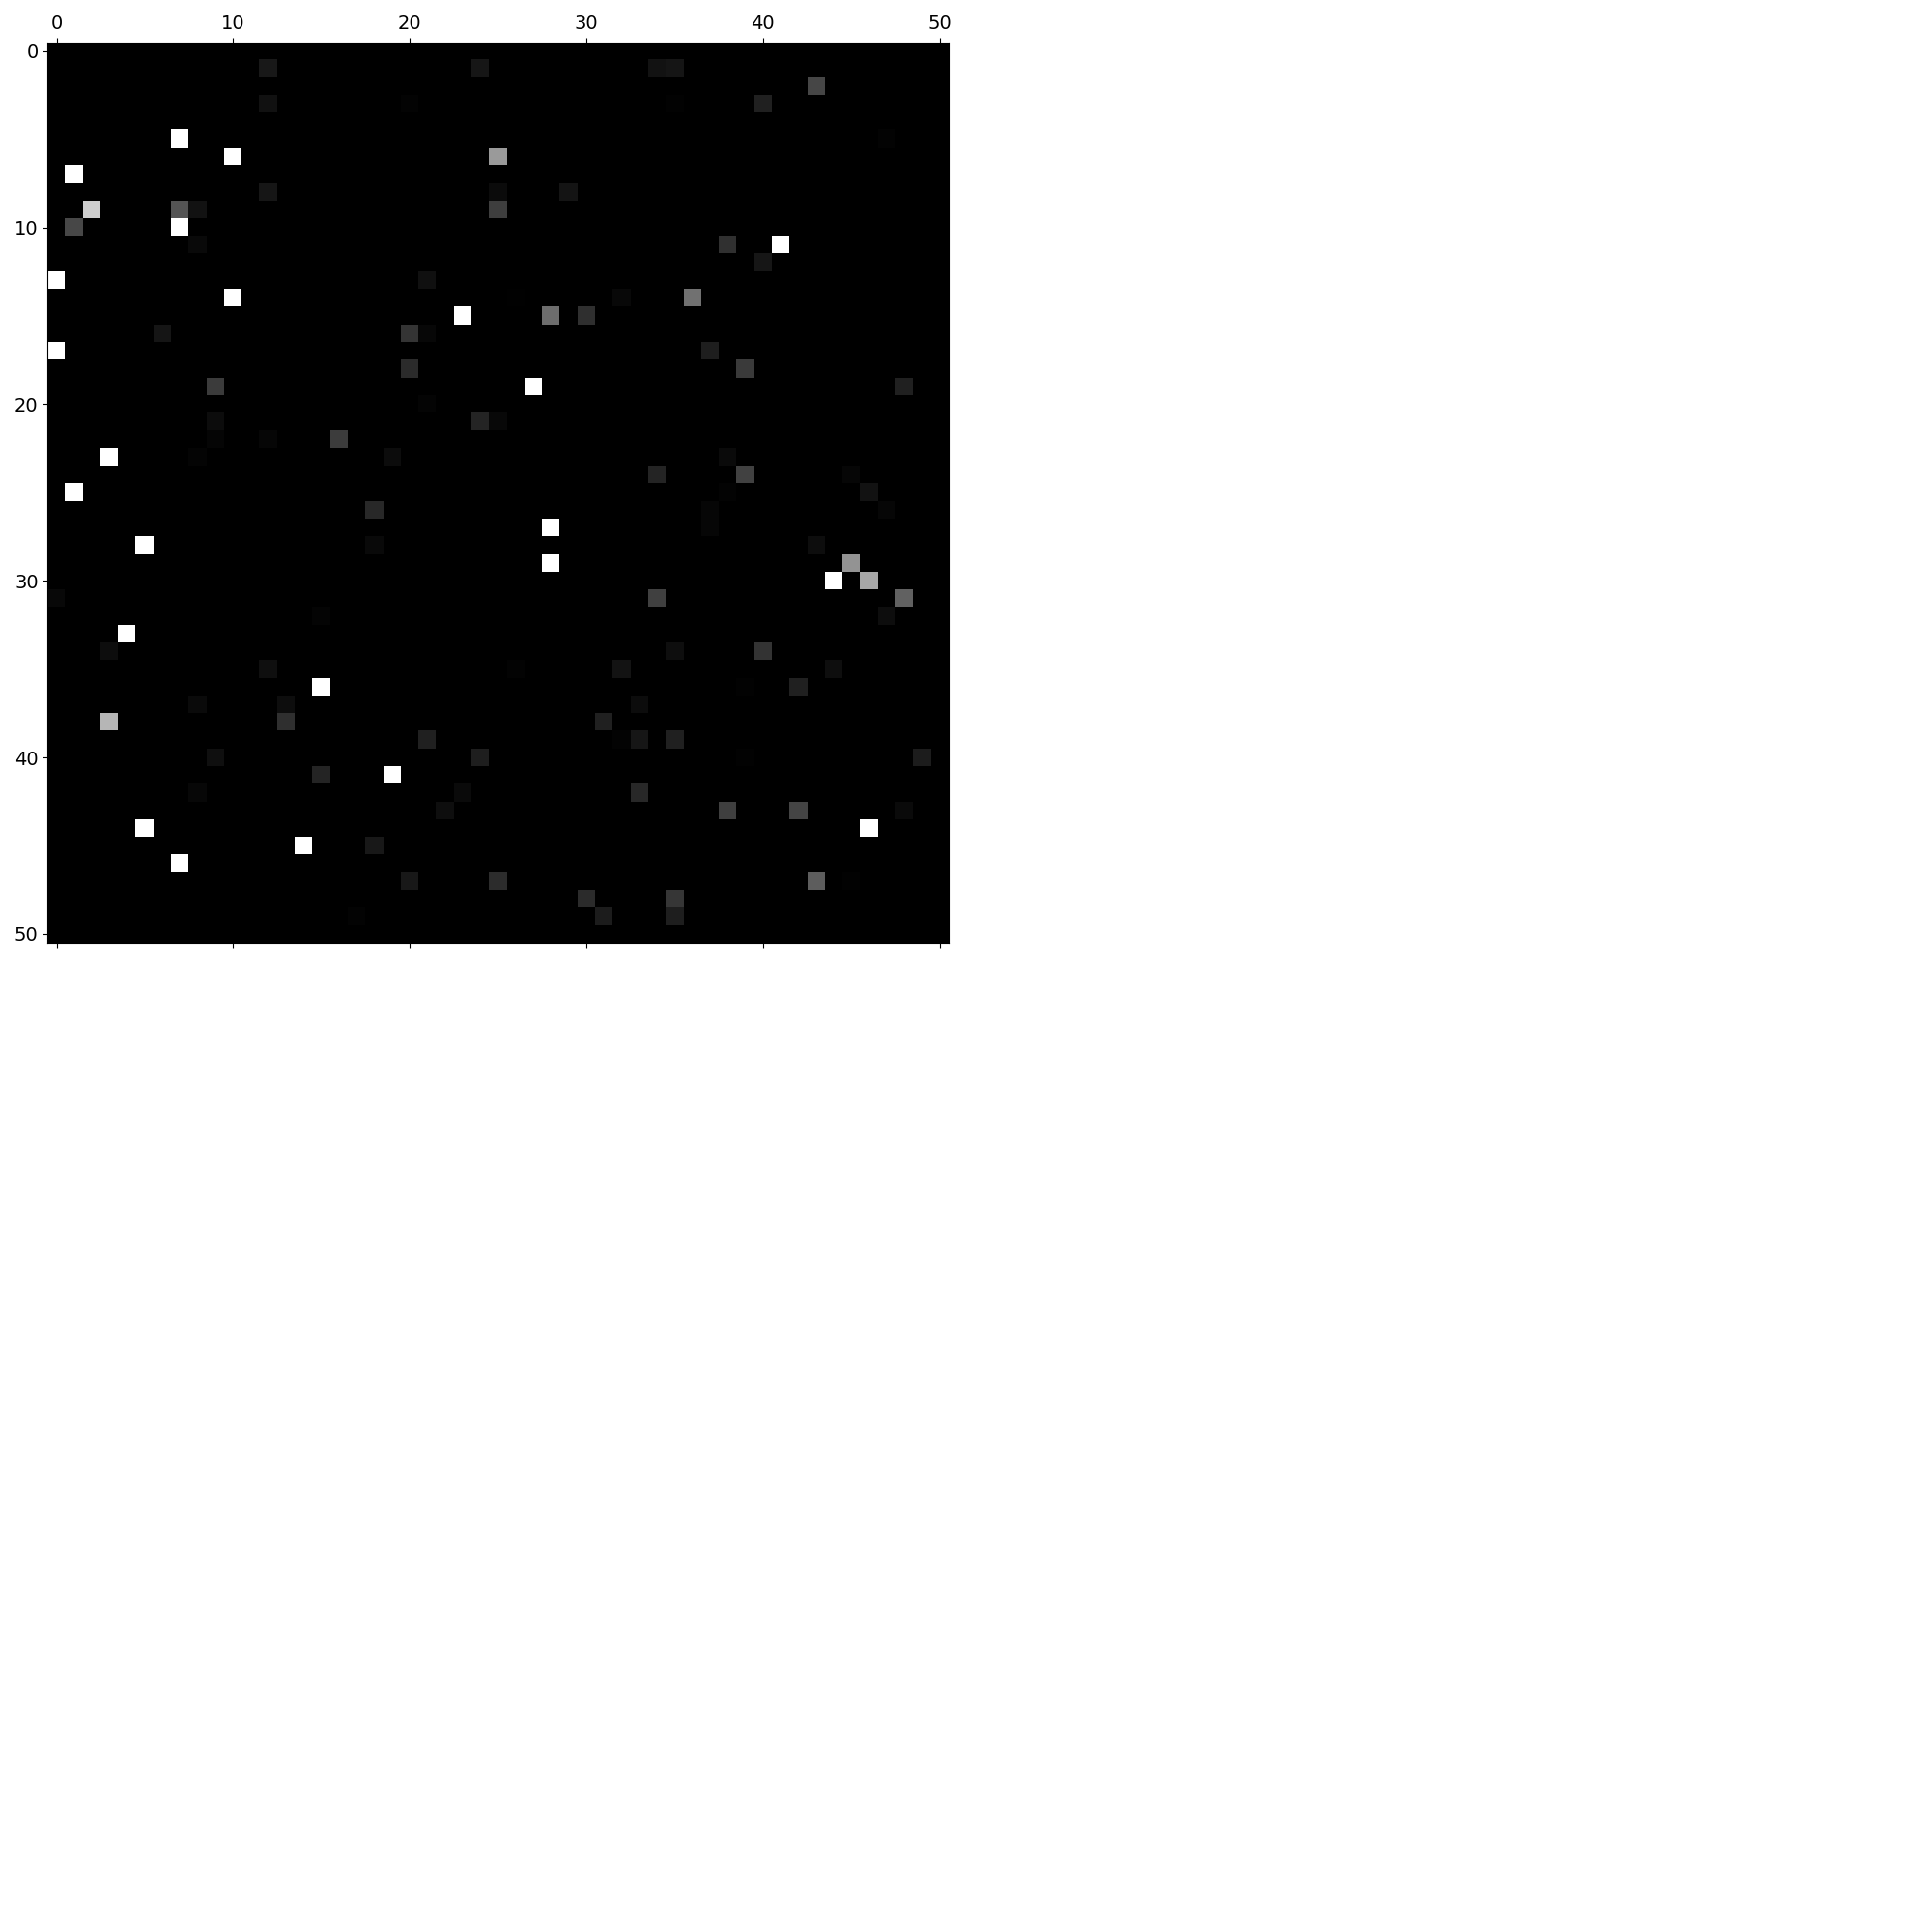

[[13, 17], [7, 25], [9], [23, 38], [33], [28, 44], [], [5, 10, 46], [], [], [6, 14], [], [], [], [45], [36], [], [], [], [41], [], [], [], [15], [], [6], [], [19], [27, 29], [], [], [], [], [], [], [], [], [], [], [], [], [11], [], [], [30], [29], [30, 44], [], [], [], []]


NameError: name 'max_locs_per_col' is not defined

In [63]:
'wide'
direc = './data/2020-11-04--19:37'
file_names = sorted(all_files_from_dir(direc))
plt.ion()
fig, ax = plt.subplots(1, 1, figsize=(10, 10), tight_layout=True)

for i_f in range(0, len(file_names)):
    file = file_names[i_f]
    loaded = sio.loadmat(os.path.join(direc, file))
    graph_weight_matrix(loaded['w_r_e'], '', ax=ax, v_max=0.26*0.004 / 5)
    fig.canvas.draw()
    time.sleep(0.000001)
    
    if i_f == len(file_names) - 1:
        w_r = loaded['w_r_e']
        
sort_mat(w_r, 0.26*0.004 / 5 * 0.5)

<IPython.core.display.Javascript object>


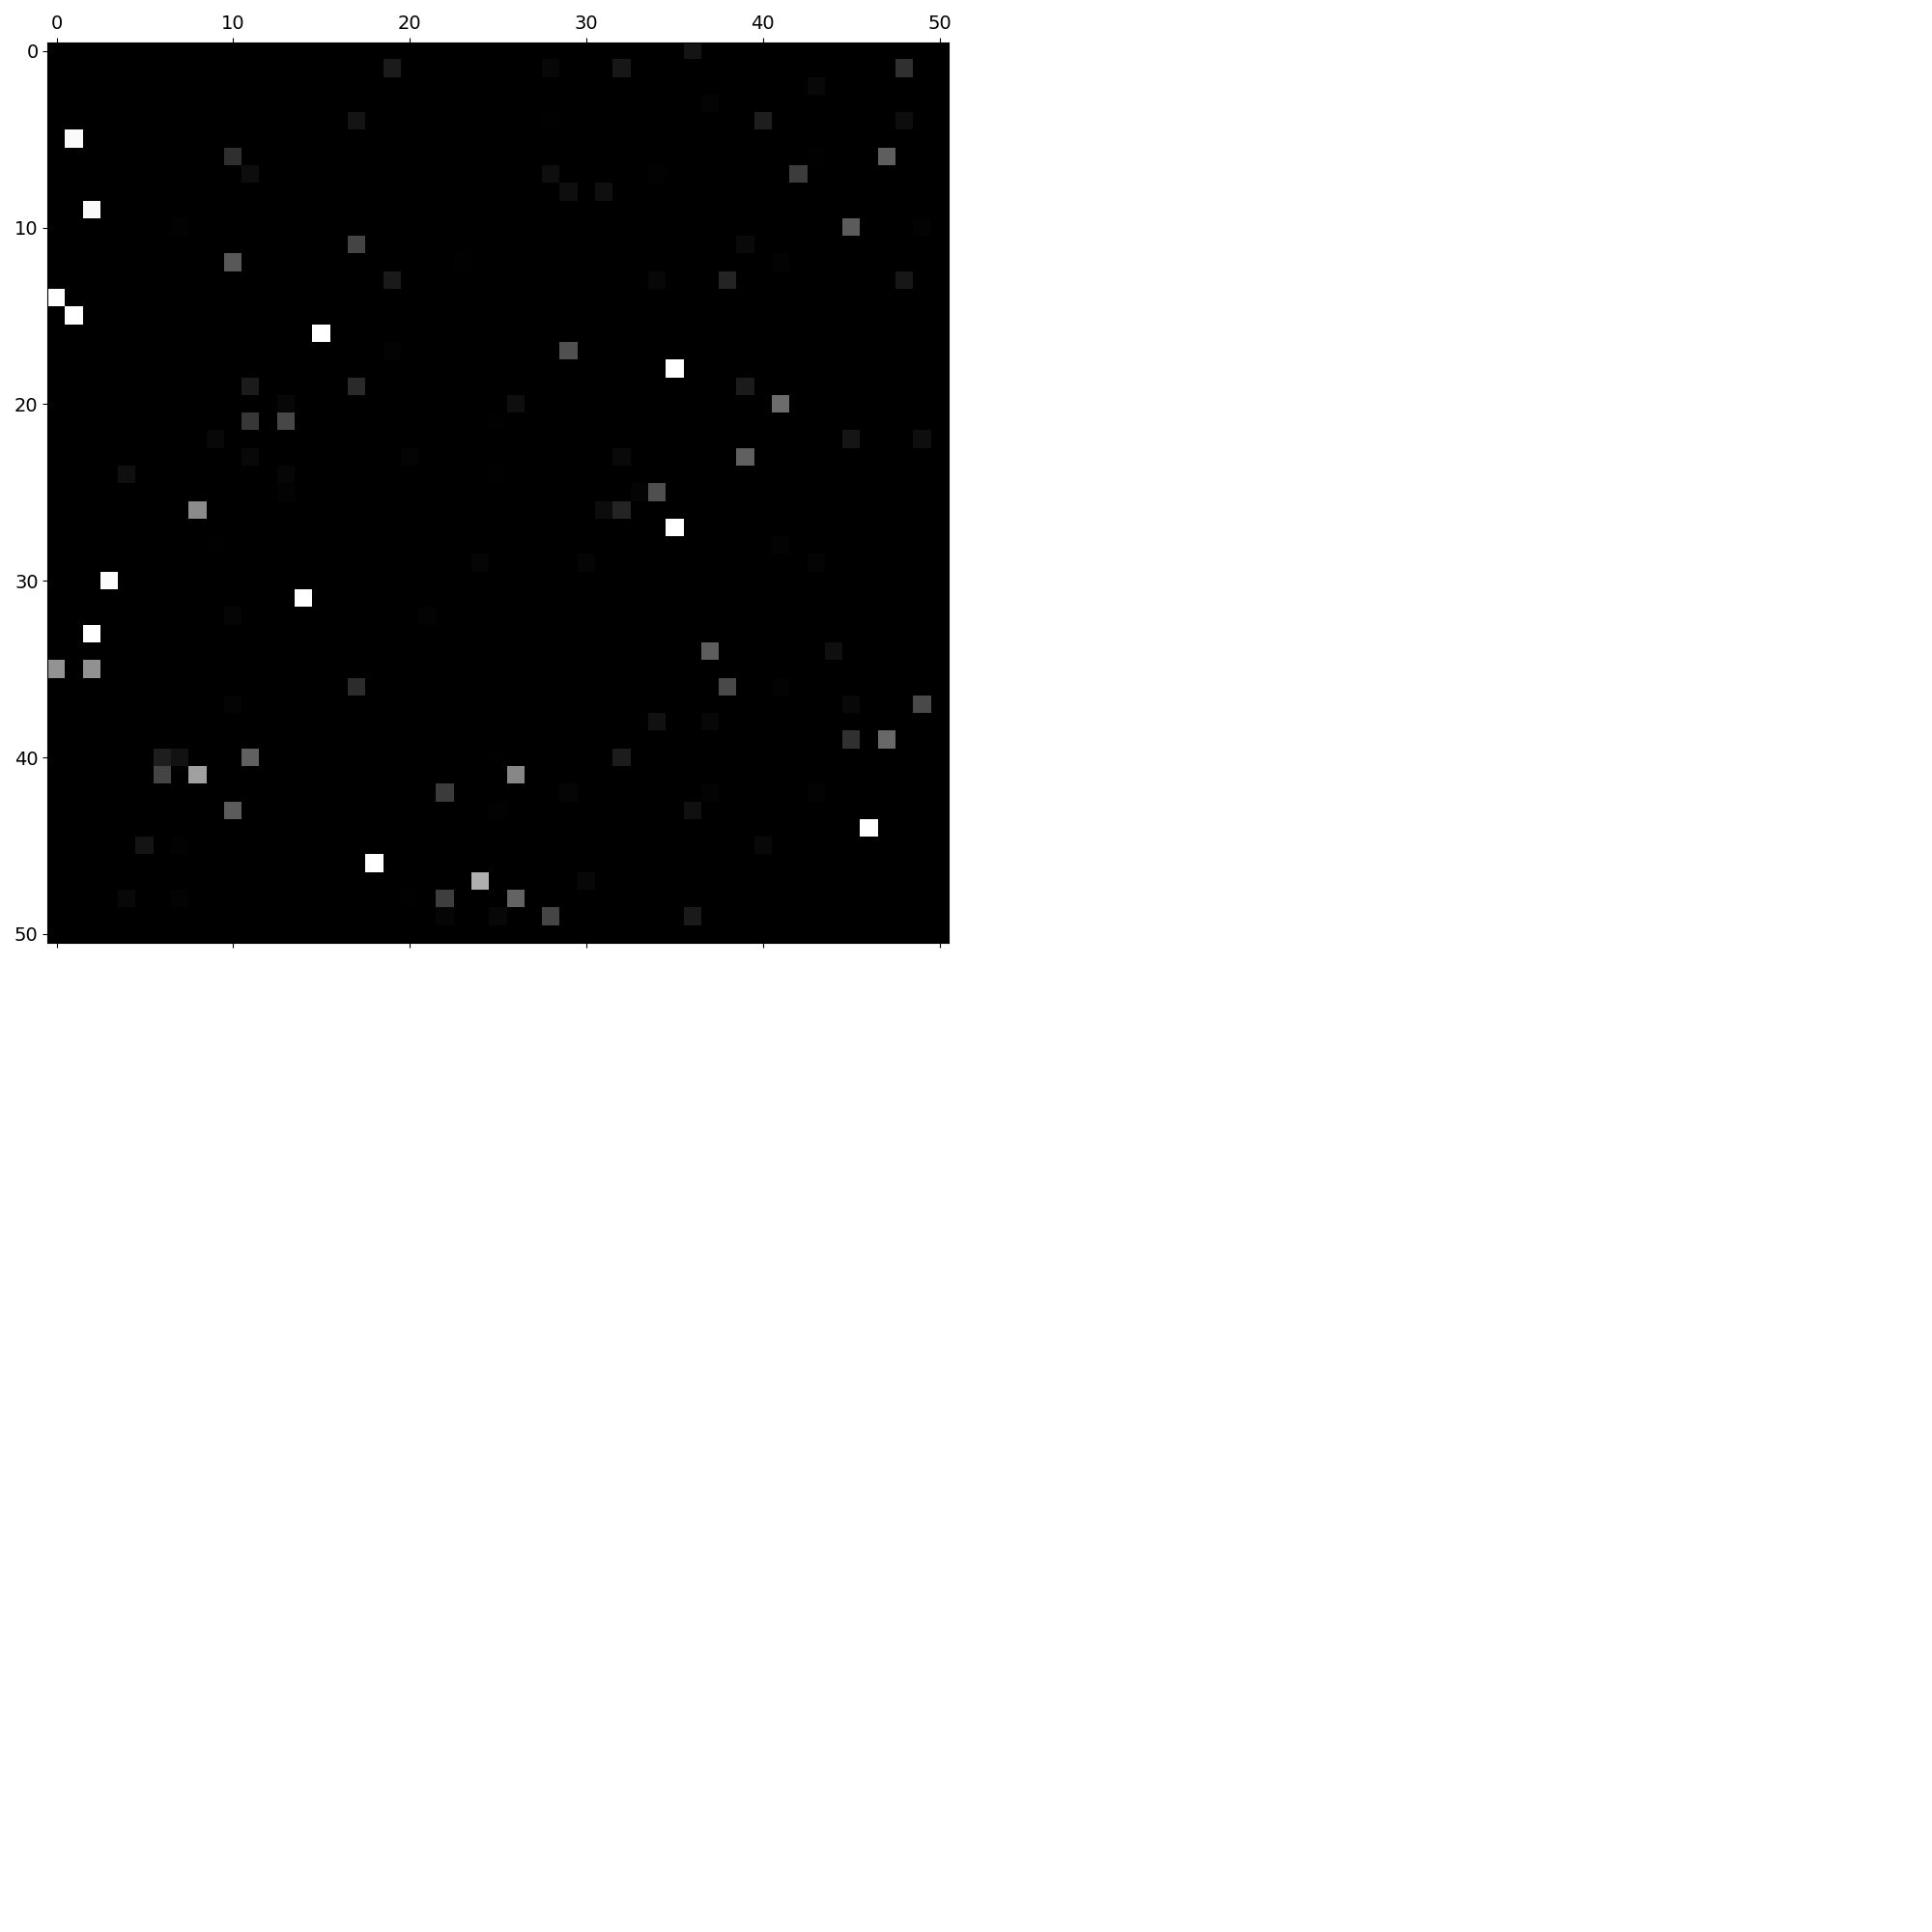

AttributeError: 'NoneType' object has no attribute 'clear'

In [79]:
'wide'
direc = './data/2020-11-04--19:51'
file_names = sorted(all_files_from_dir(direc))
plt.ion()
fig, ax = plt.subplots(1, 1, figsize=(10, 10), tight_layout=True)

for i_f in range(0, len(file_names), 10):
    file = file_names[i_f]
    loaded = sio.loadmat(os.path.join(direc, file))
    graph_weight_matrix(loaded['w_r_e'], '', ax=ax, v_max=0.26*0.004 / 5)
    fig.canvas.draw()
    time.sleep(0.000001)
    
    if i_f == len(file_names) - 1:
        w_r = loaded['w_r_e']
        
graph_weight_matrix(w_r * w_r.T, '', v_max=0.26*0.004 / 5)
        
sort_mat(w_r, 0.26*0.004 / 5 * 0.5, v_max=0.26*0.004 / 5)

In [62]:
sort_mat(w_r, 0.26*0.004 / 5 * 0.5)

[[14, 35], [5, 15], [9, 33, 35], [30], [], [], [], [], [26, 41], [], [], [], [], [], [31], [16], [], [], [46], [], [], [], [], [], [47], [], [41], [], [], [], [], [], [], [], [], [18, 27], [], [], [], [], [], [], [], [], [], [], [44], [], [], [], []]


NameError: name 'max_locs_per_col' is not defined

<IPython.core.display.Javascript object>


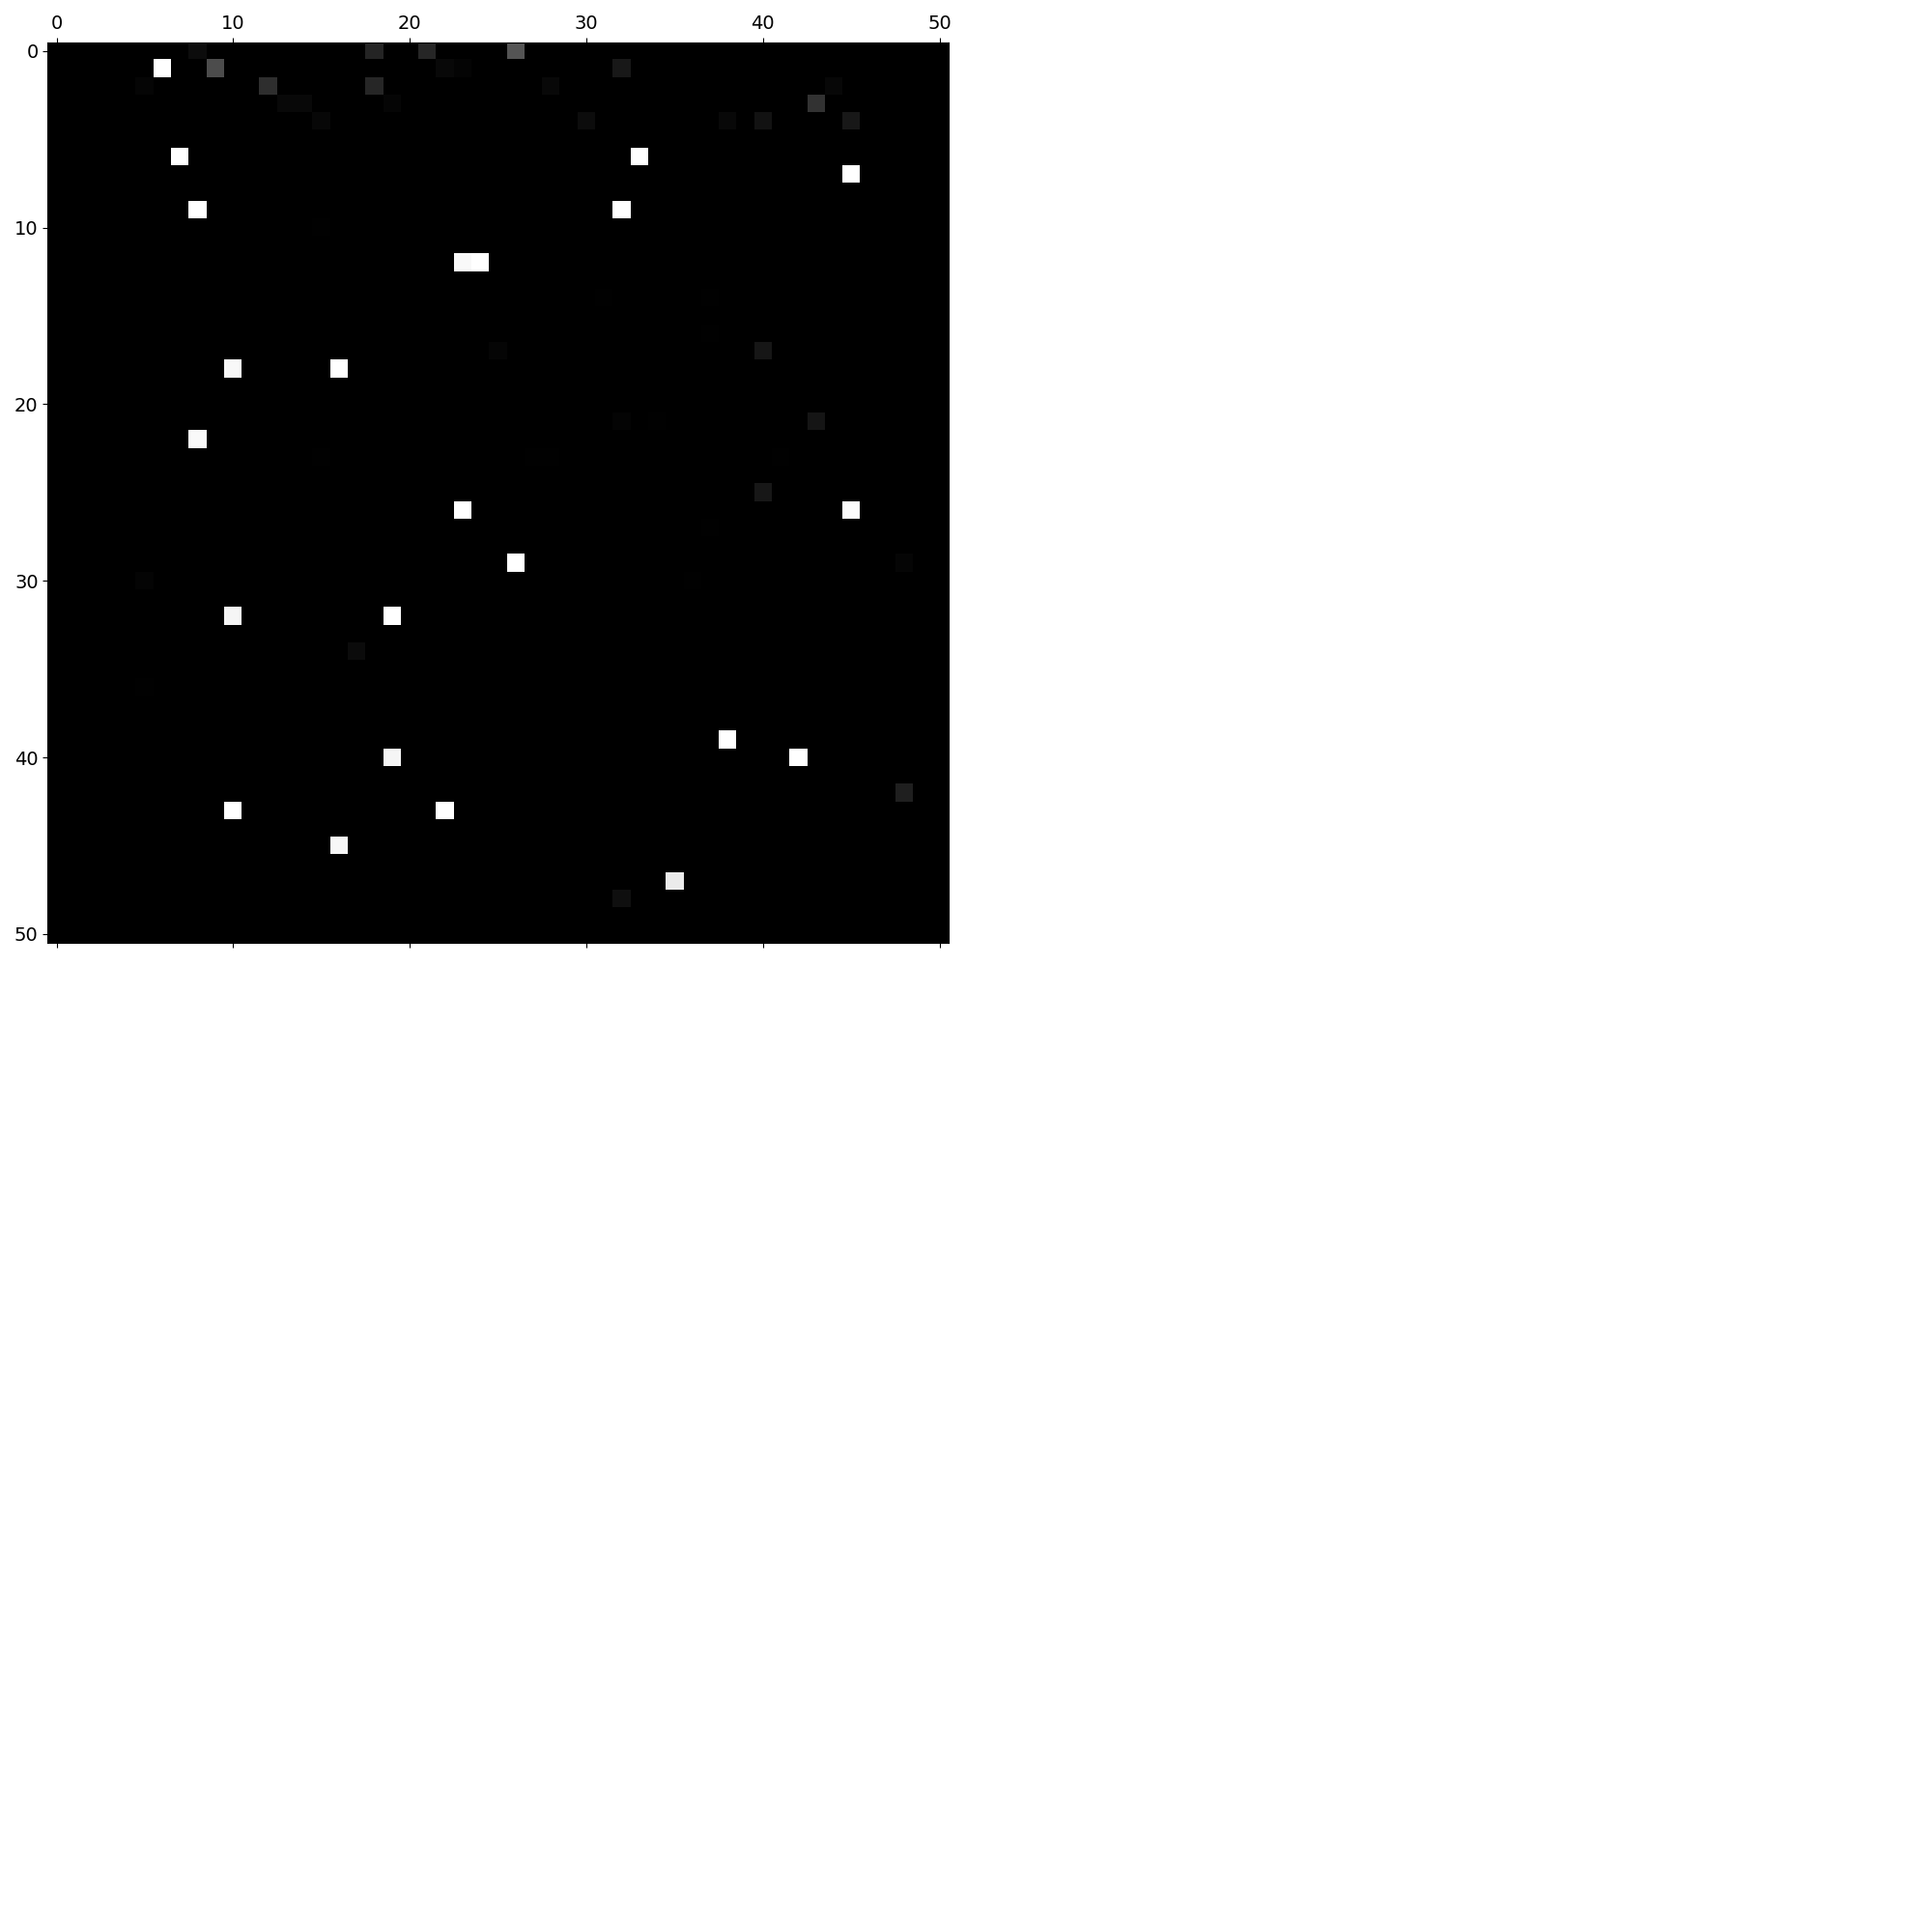

[[], [], [], [], [], [], [1], [6], [9, 22], [], [18, 32, 43], [], [], [], [], [], [18, 45], [], [], [32, 40], [], [], [43], [12, 26], [12], [], [29], [], [], [], [], [], [9], [6], [], [47], [], [], [39], [], [], [], [40], [], [], [7, 26], [], [], [], [], []]


NameError: name 'max_locs_per_col' is not defined

In [80]:
'wide'
direc = './data/2020-11-04--20:26'
file_names = sorted(all_files_from_dir(direc))
plt.ion()
fig, ax = plt.subplots(1, 1, figsize=(10, 10), tight_layout=True)

for i_f in range(0, len(file_names)):
    file = file_names[i_f]
    loaded = sio.loadmat(os.path.join(direc, file))
    graph_weight_matrix(loaded['w_r_e'], '', ax=ax, v_max=0.26*0.004 / 5)
    fig.canvas.draw()
    time.sleep(0.000001)
    
    if i_f == len(file_names) - 1:
        w_r = loaded['w_r_e']
        
sort_mat(w_r, 0.26*0.004 / 5 * 0.5)

<IPython.core.display.Javascript object>


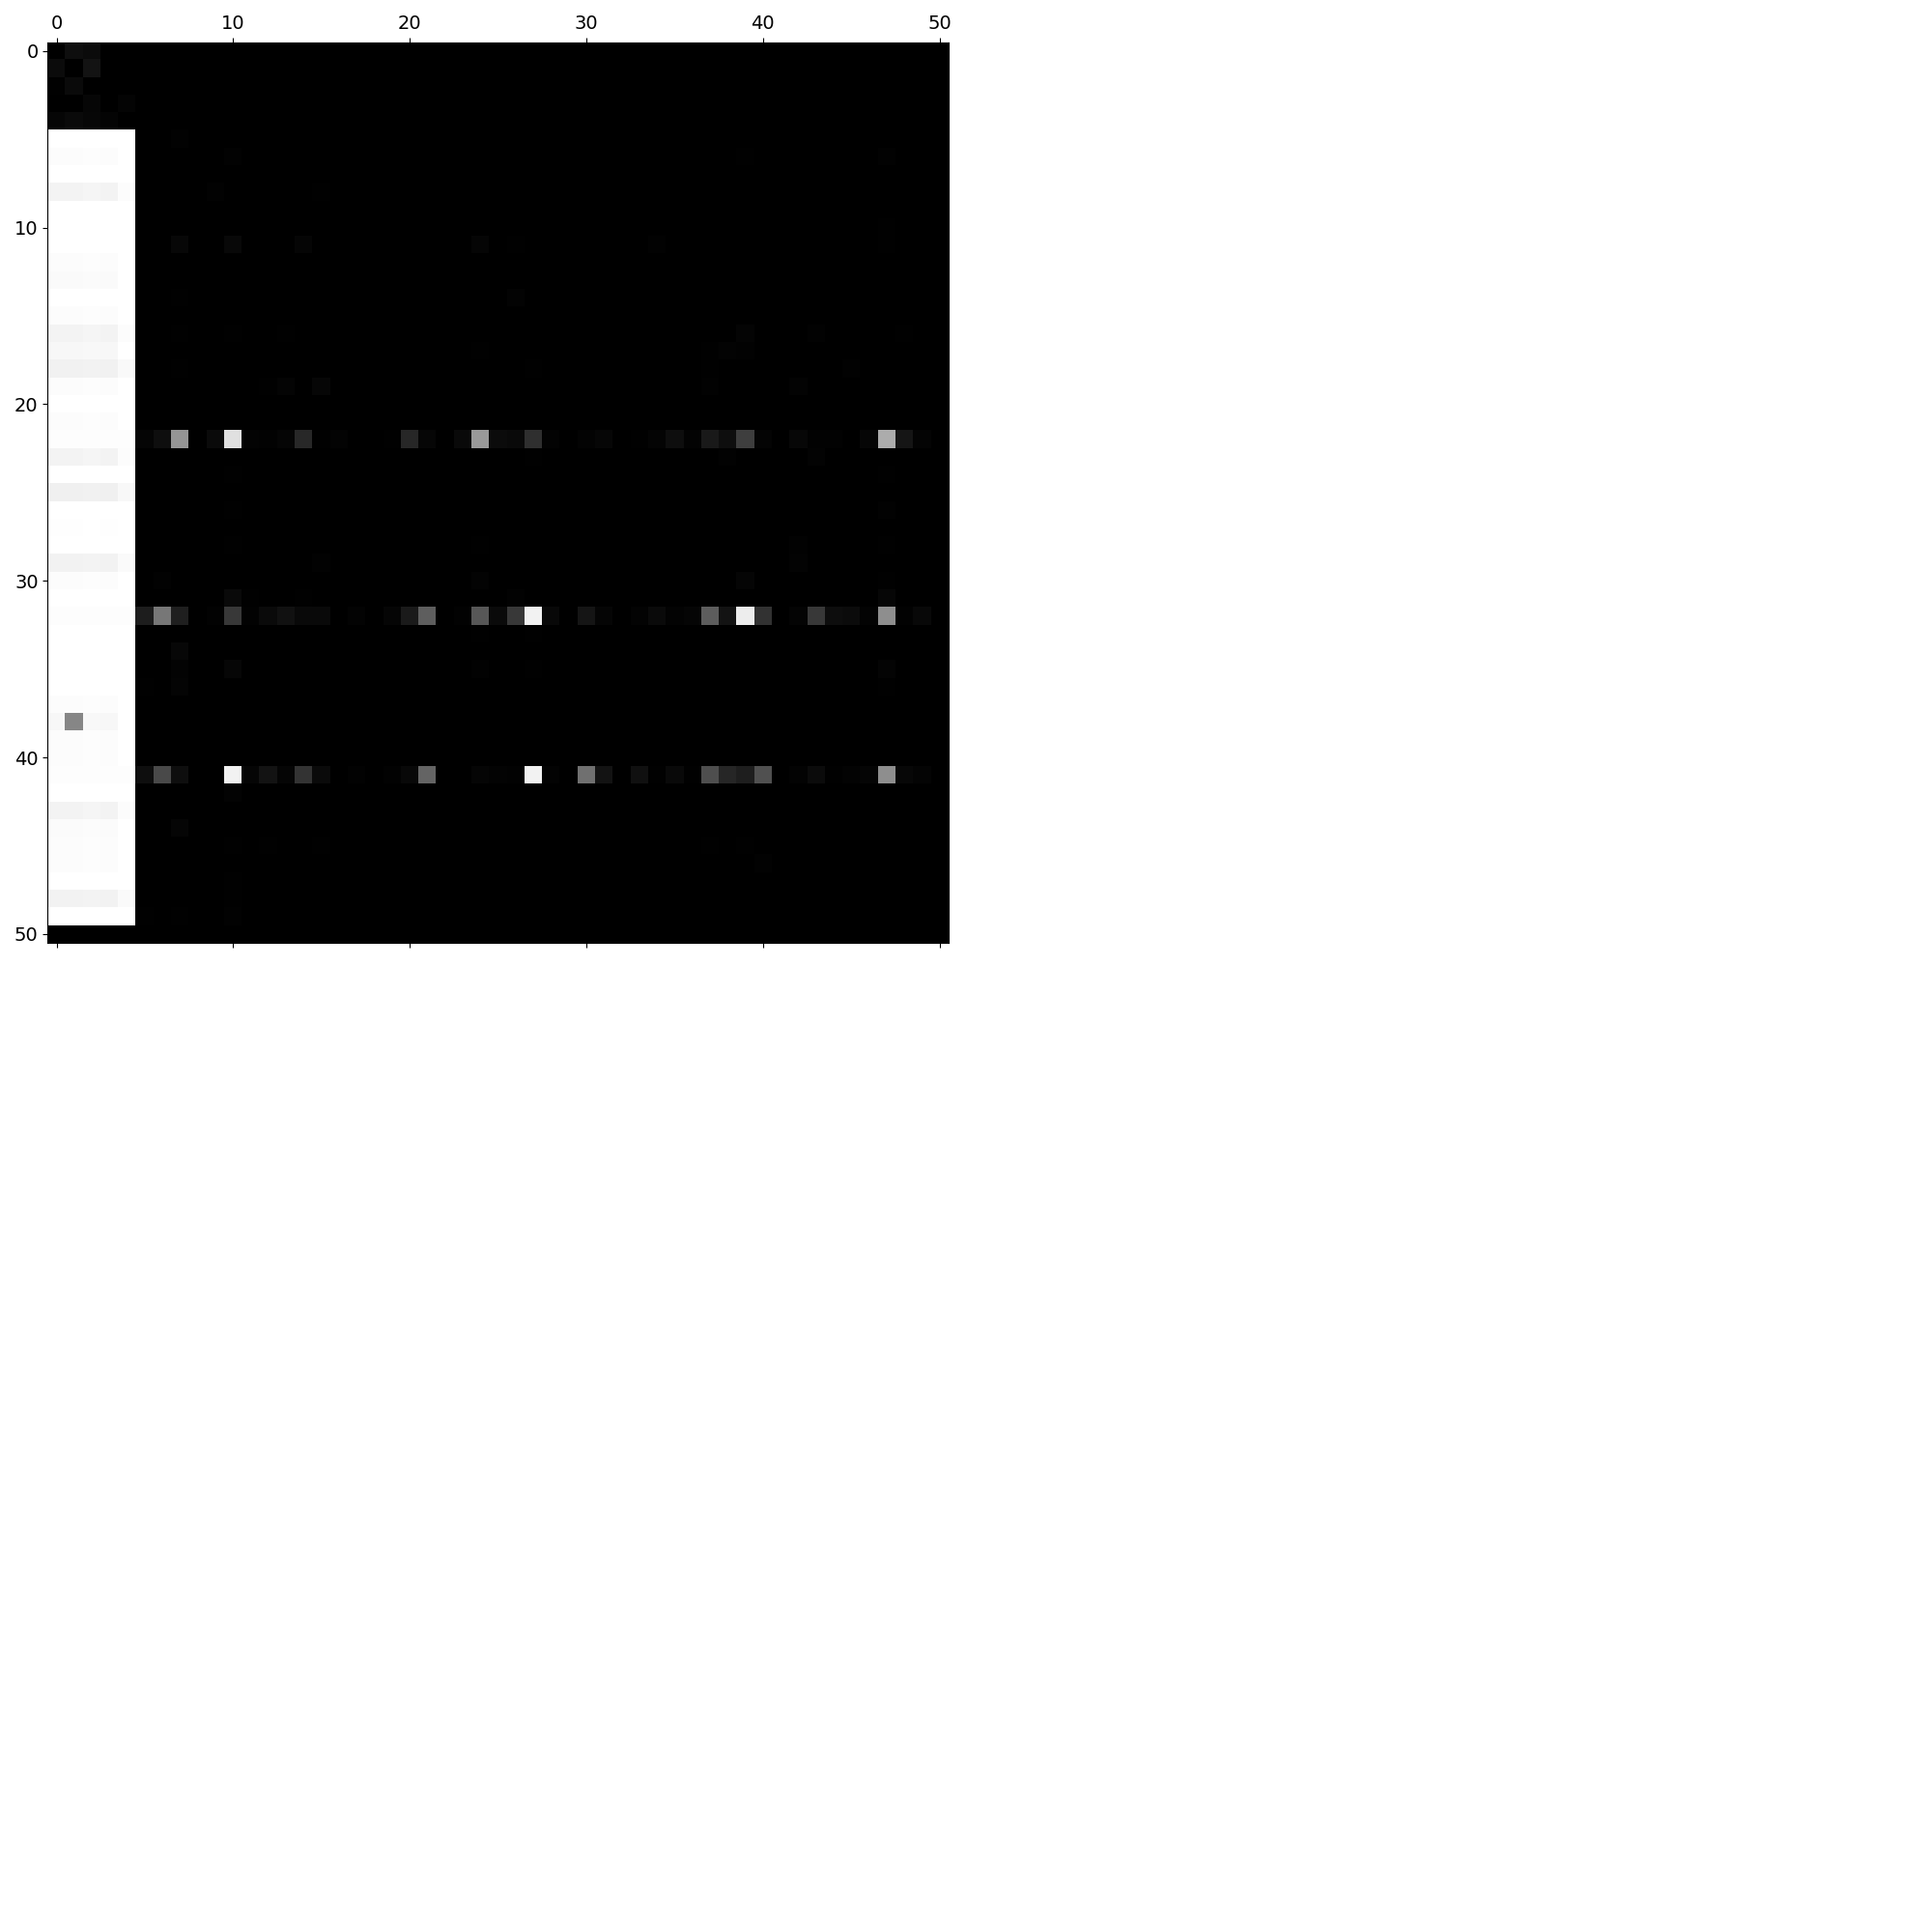

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


NameError: name 'max_locs_per_col' is not defined

In [21]:
'wide'
direc = './data/2020-11-18--22:32'
file_names = sorted(all_files_from_dir(direc))
plt.ion()
fig, ax = plt.subplots(1, 1, figsize=(10, 10), tight_layout=True)

for i_f in range(0, len(file_names)):
    file = file_names[i_f]
    loaded = sio.loadmat(os.path.join(direc, file))
    graph_weight_matrix(loaded['w_r_e'], '', ax=ax, v_max=0.26*0.004 / 5)
    fig.canvas.draw()
    time.sleep(0.0001)
    
    if i_f == len(file_names) - 1:
        w_r = loaded['w_r_e']
        
sort_mat(w_r, 0.26*0.004 / 5)

<IPython.core.display.Javascript object>


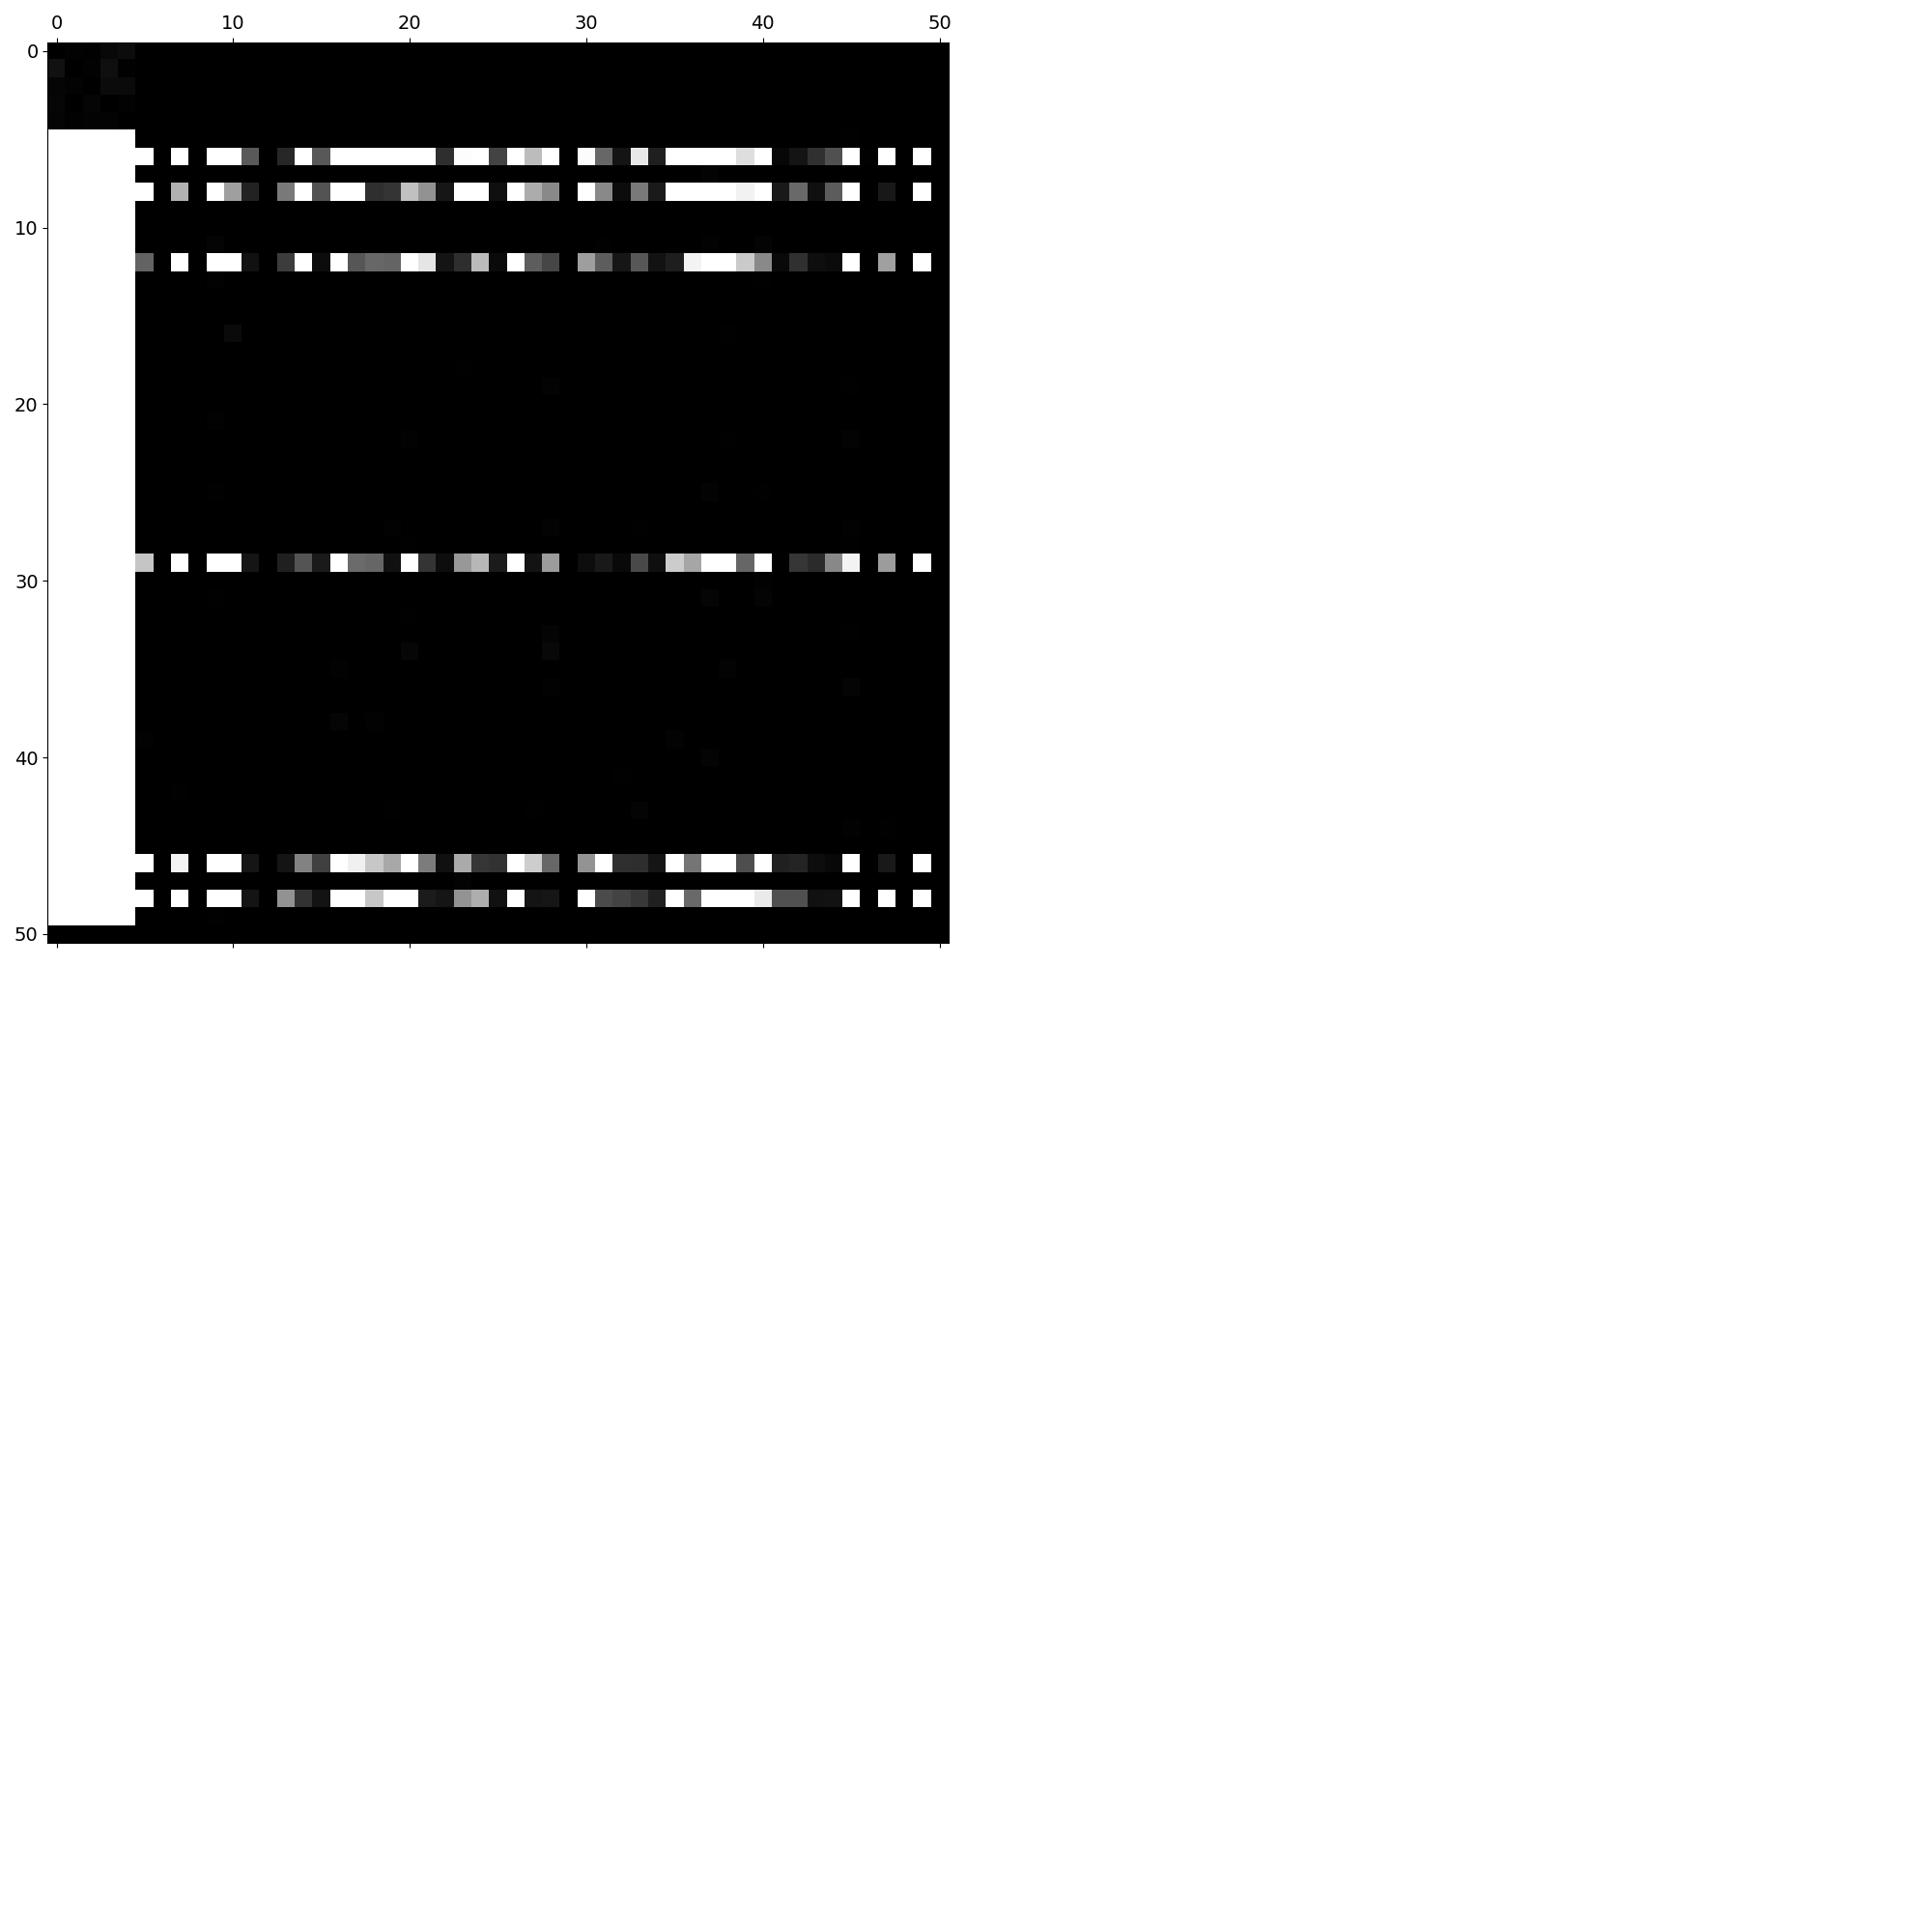

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


NameError: name 'max_locs_per_col' is not defined

In [24]:
'wide'
direc = './data/2020-11-18--22:36'
file_names = sorted(all_files_from_dir(direc))
plt.ion()
fig, ax = plt.subplots(1, 1, figsize=(10, 10), tight_layout=True)

for i_f in range(0, len(file_names)):
    file = file_names[i_f]
    loaded = sio.loadmat(os.path.join(direc, file))
    graph_weight_matrix(loaded['w_r_e'], '', ax=ax, v_max=0.26*0.004 / 5)
    fig.canvas.draw()
    time.sleep(0.0001)
    
    if i_f == len(file_names) - 1:
        w_r = loaded['w_r_e']
        
sort_mat(w_r, 0.26*0.004 / 5)

<IPython.core.display.Javascript object>


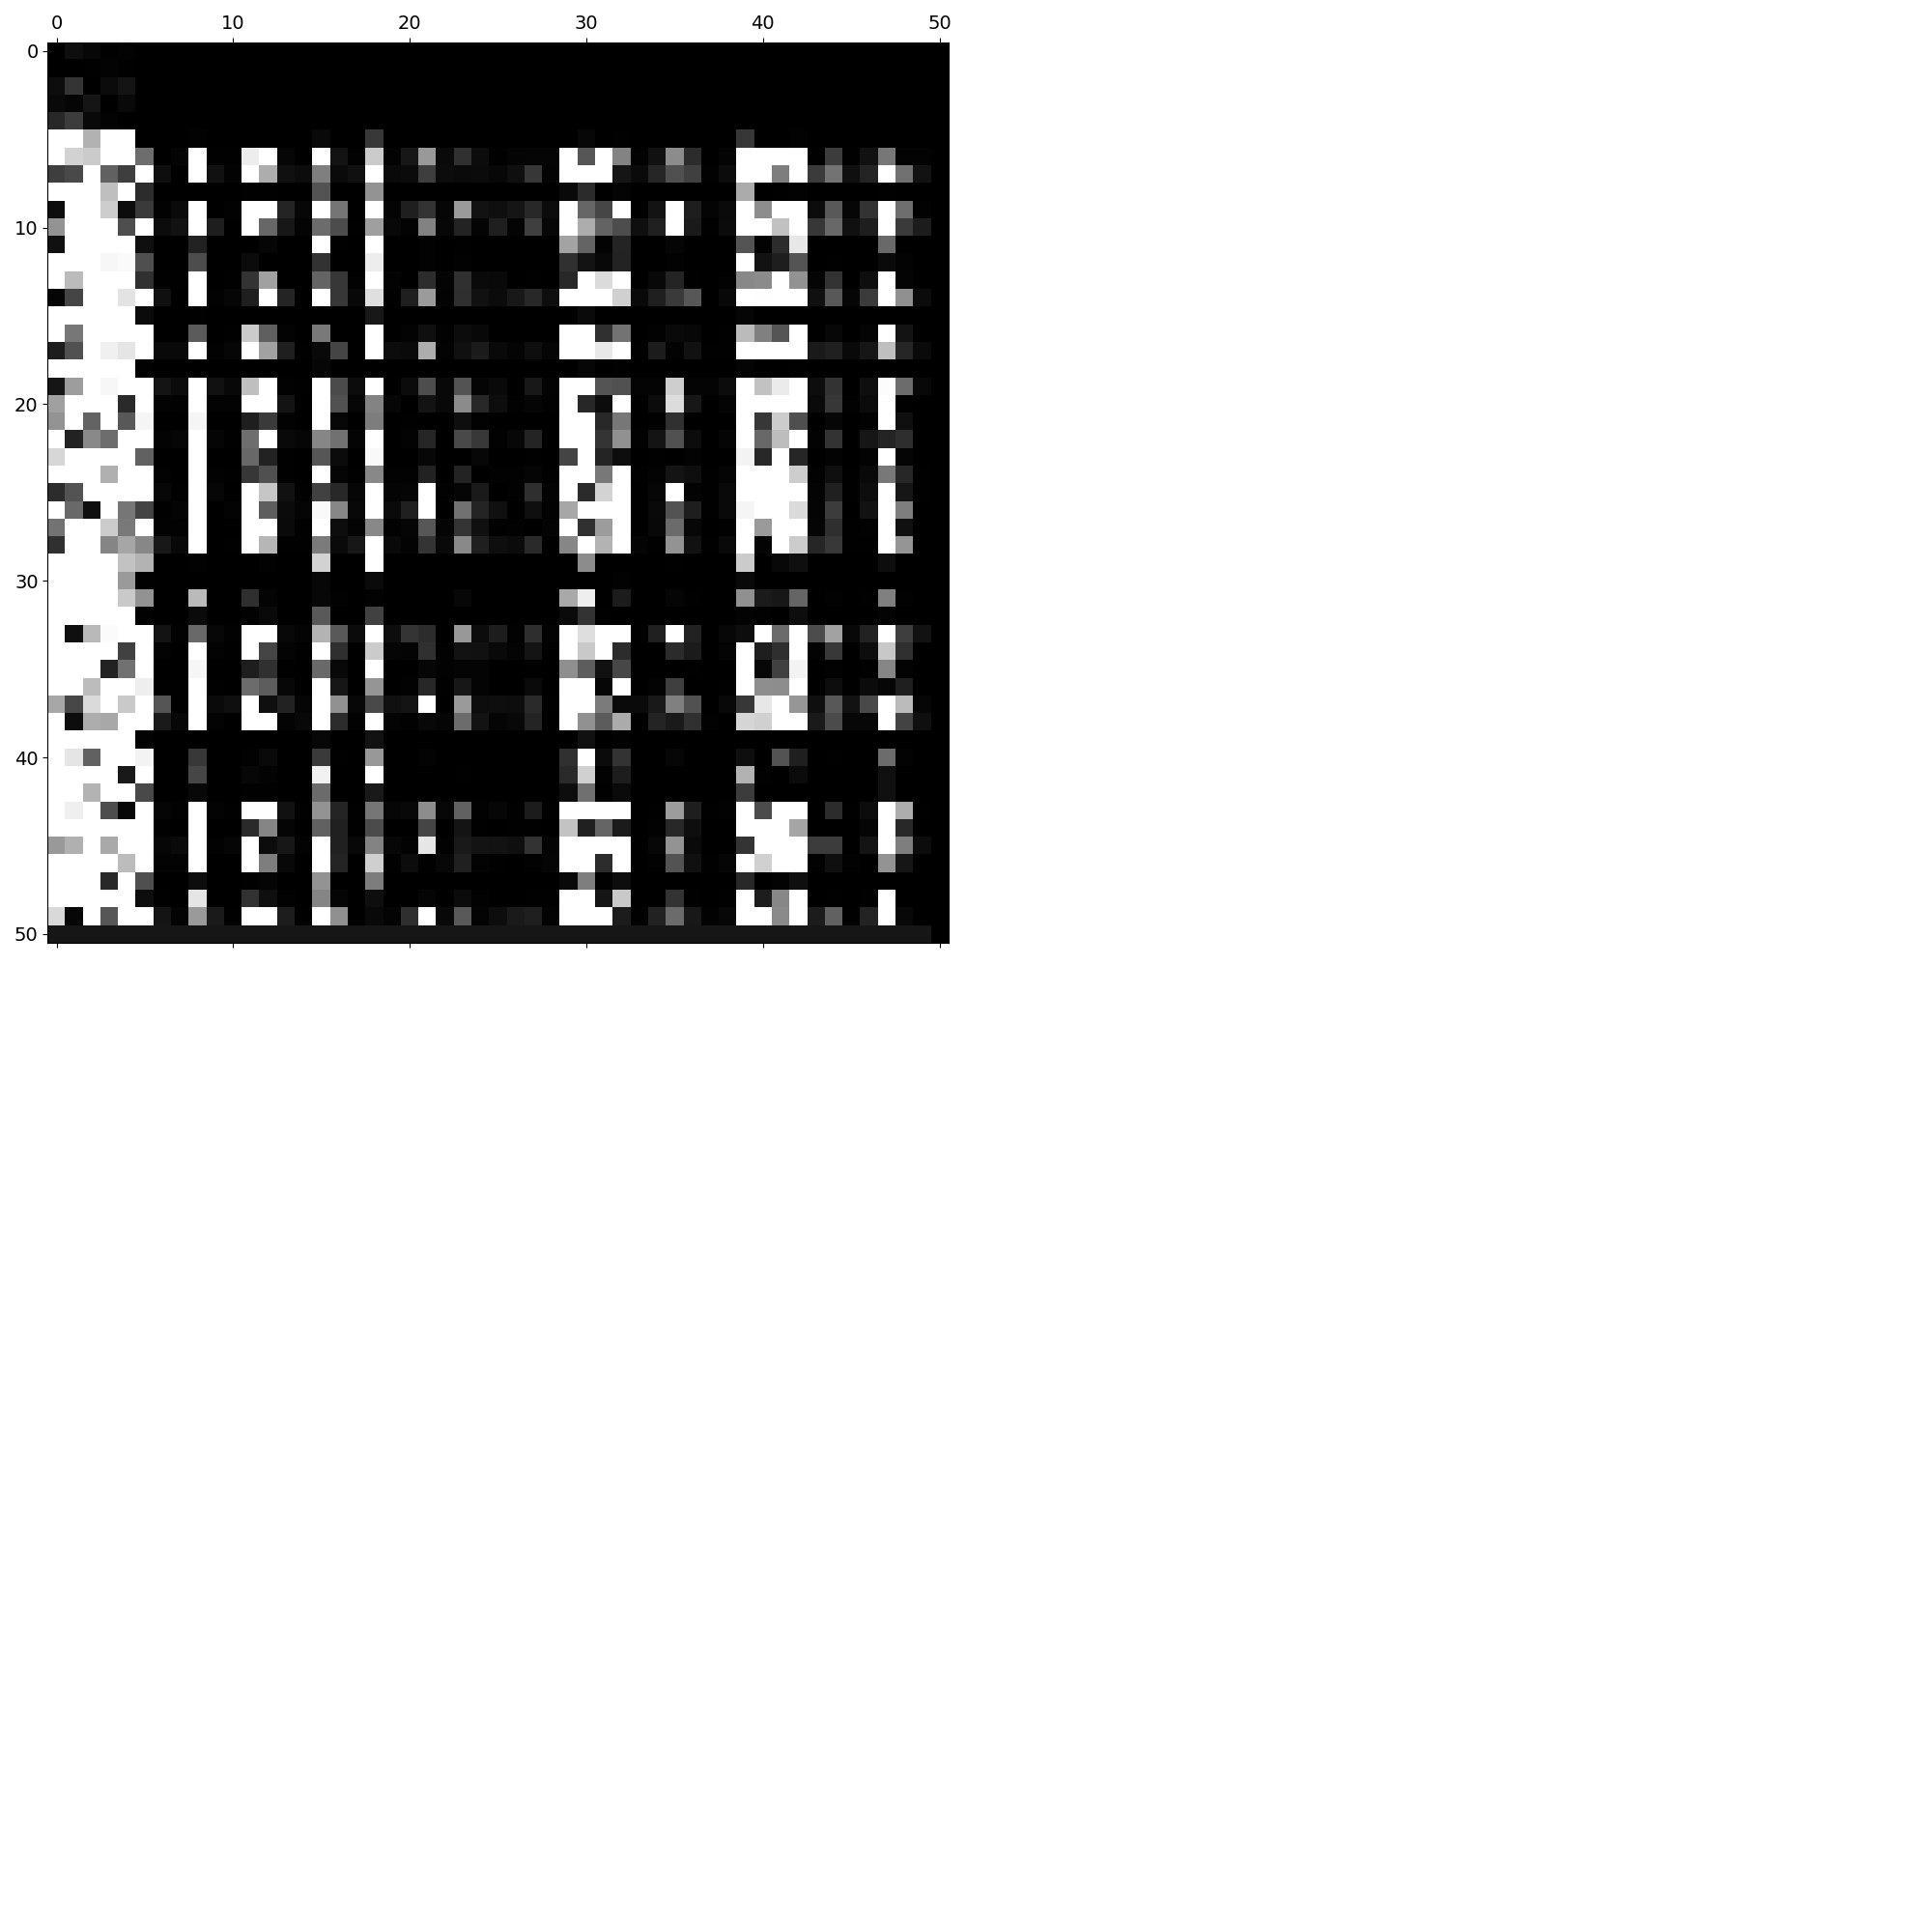

KeyboardInterrupt: 

In [40]:
'wide'
direc = './data/2020-11-19--00:08--50'
file_names = sorted(all_files_from_dir(direc))
plt.ion()
fig, ax = plt.subplots(1, 1, figsize=(10, 10), tight_layout=True)

for i_f in range(0, len(file_names)):
    file = file_names[i_f]
    loaded = sio.loadmat(os.path.join(direc, file))
    graph_weight_matrix(loaded['w_r_e'], '', ax=ax, v_max=0.26*0.004 / 9)
    fig.canvas.draw()
    time.sleep(0.0001)
    
    if i_f == len(file_names) - 1:
        w_r = loaded['w_r_e']
        
sort_mat(w_r, 0.26*0.004 / 5)

<IPython.core.display.Javascript object>


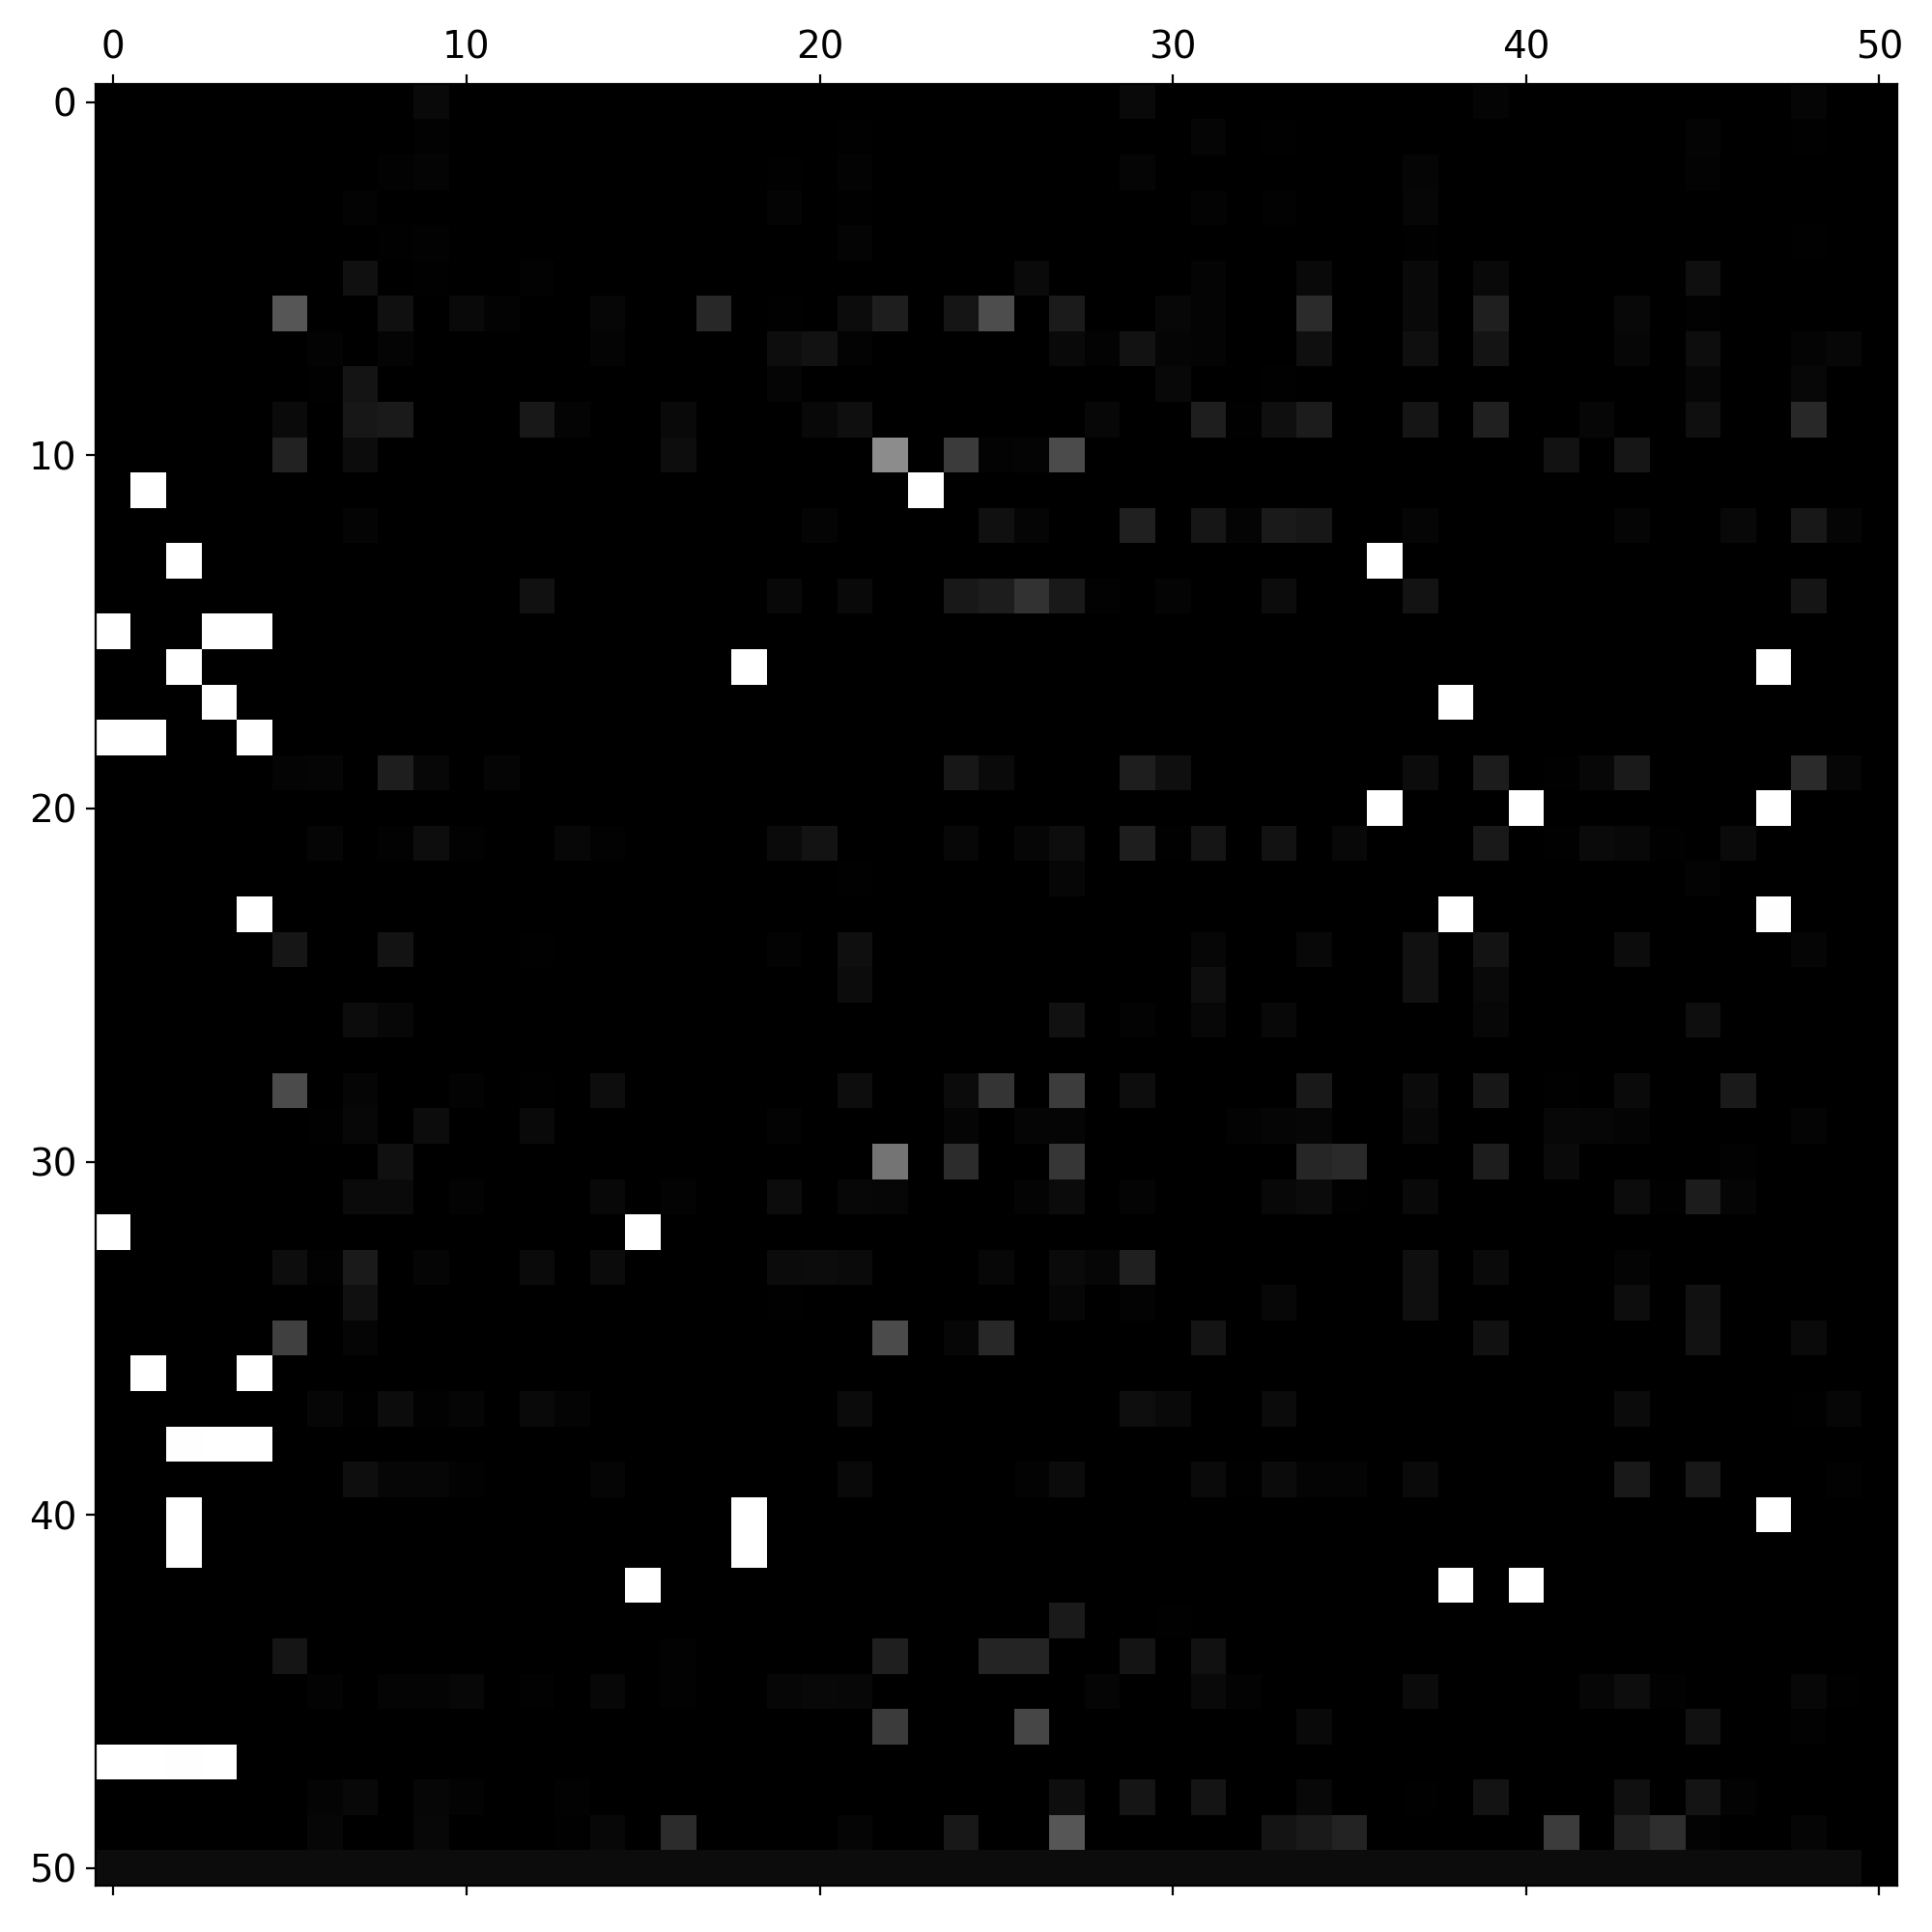

In [50]:
'wide'
direc = './data/2020-11-19--08:52--10'
file_names = sorted(all_files_from_dir(direc))
plt.ion()
fig, ax = plt.subplots(1, 1, figsize=(10, 10), tight_layout=True)

for i_f in range(0, len(file_names)):
    file = file_names[i_f]
    loaded = sio.loadmat(os.path.join(direc, file))
    graph_weight_matrix(loaded['w_r_e'], '', ax=ax, v_max=0.26*0.004 / 5)
    fig.canvas.draw()
    time.sleep(0.0001)
    
    if i_f == len(file_names) - 1:
        w_r = loaded['w_r_e']

<IPython.core.display.Javascript object>


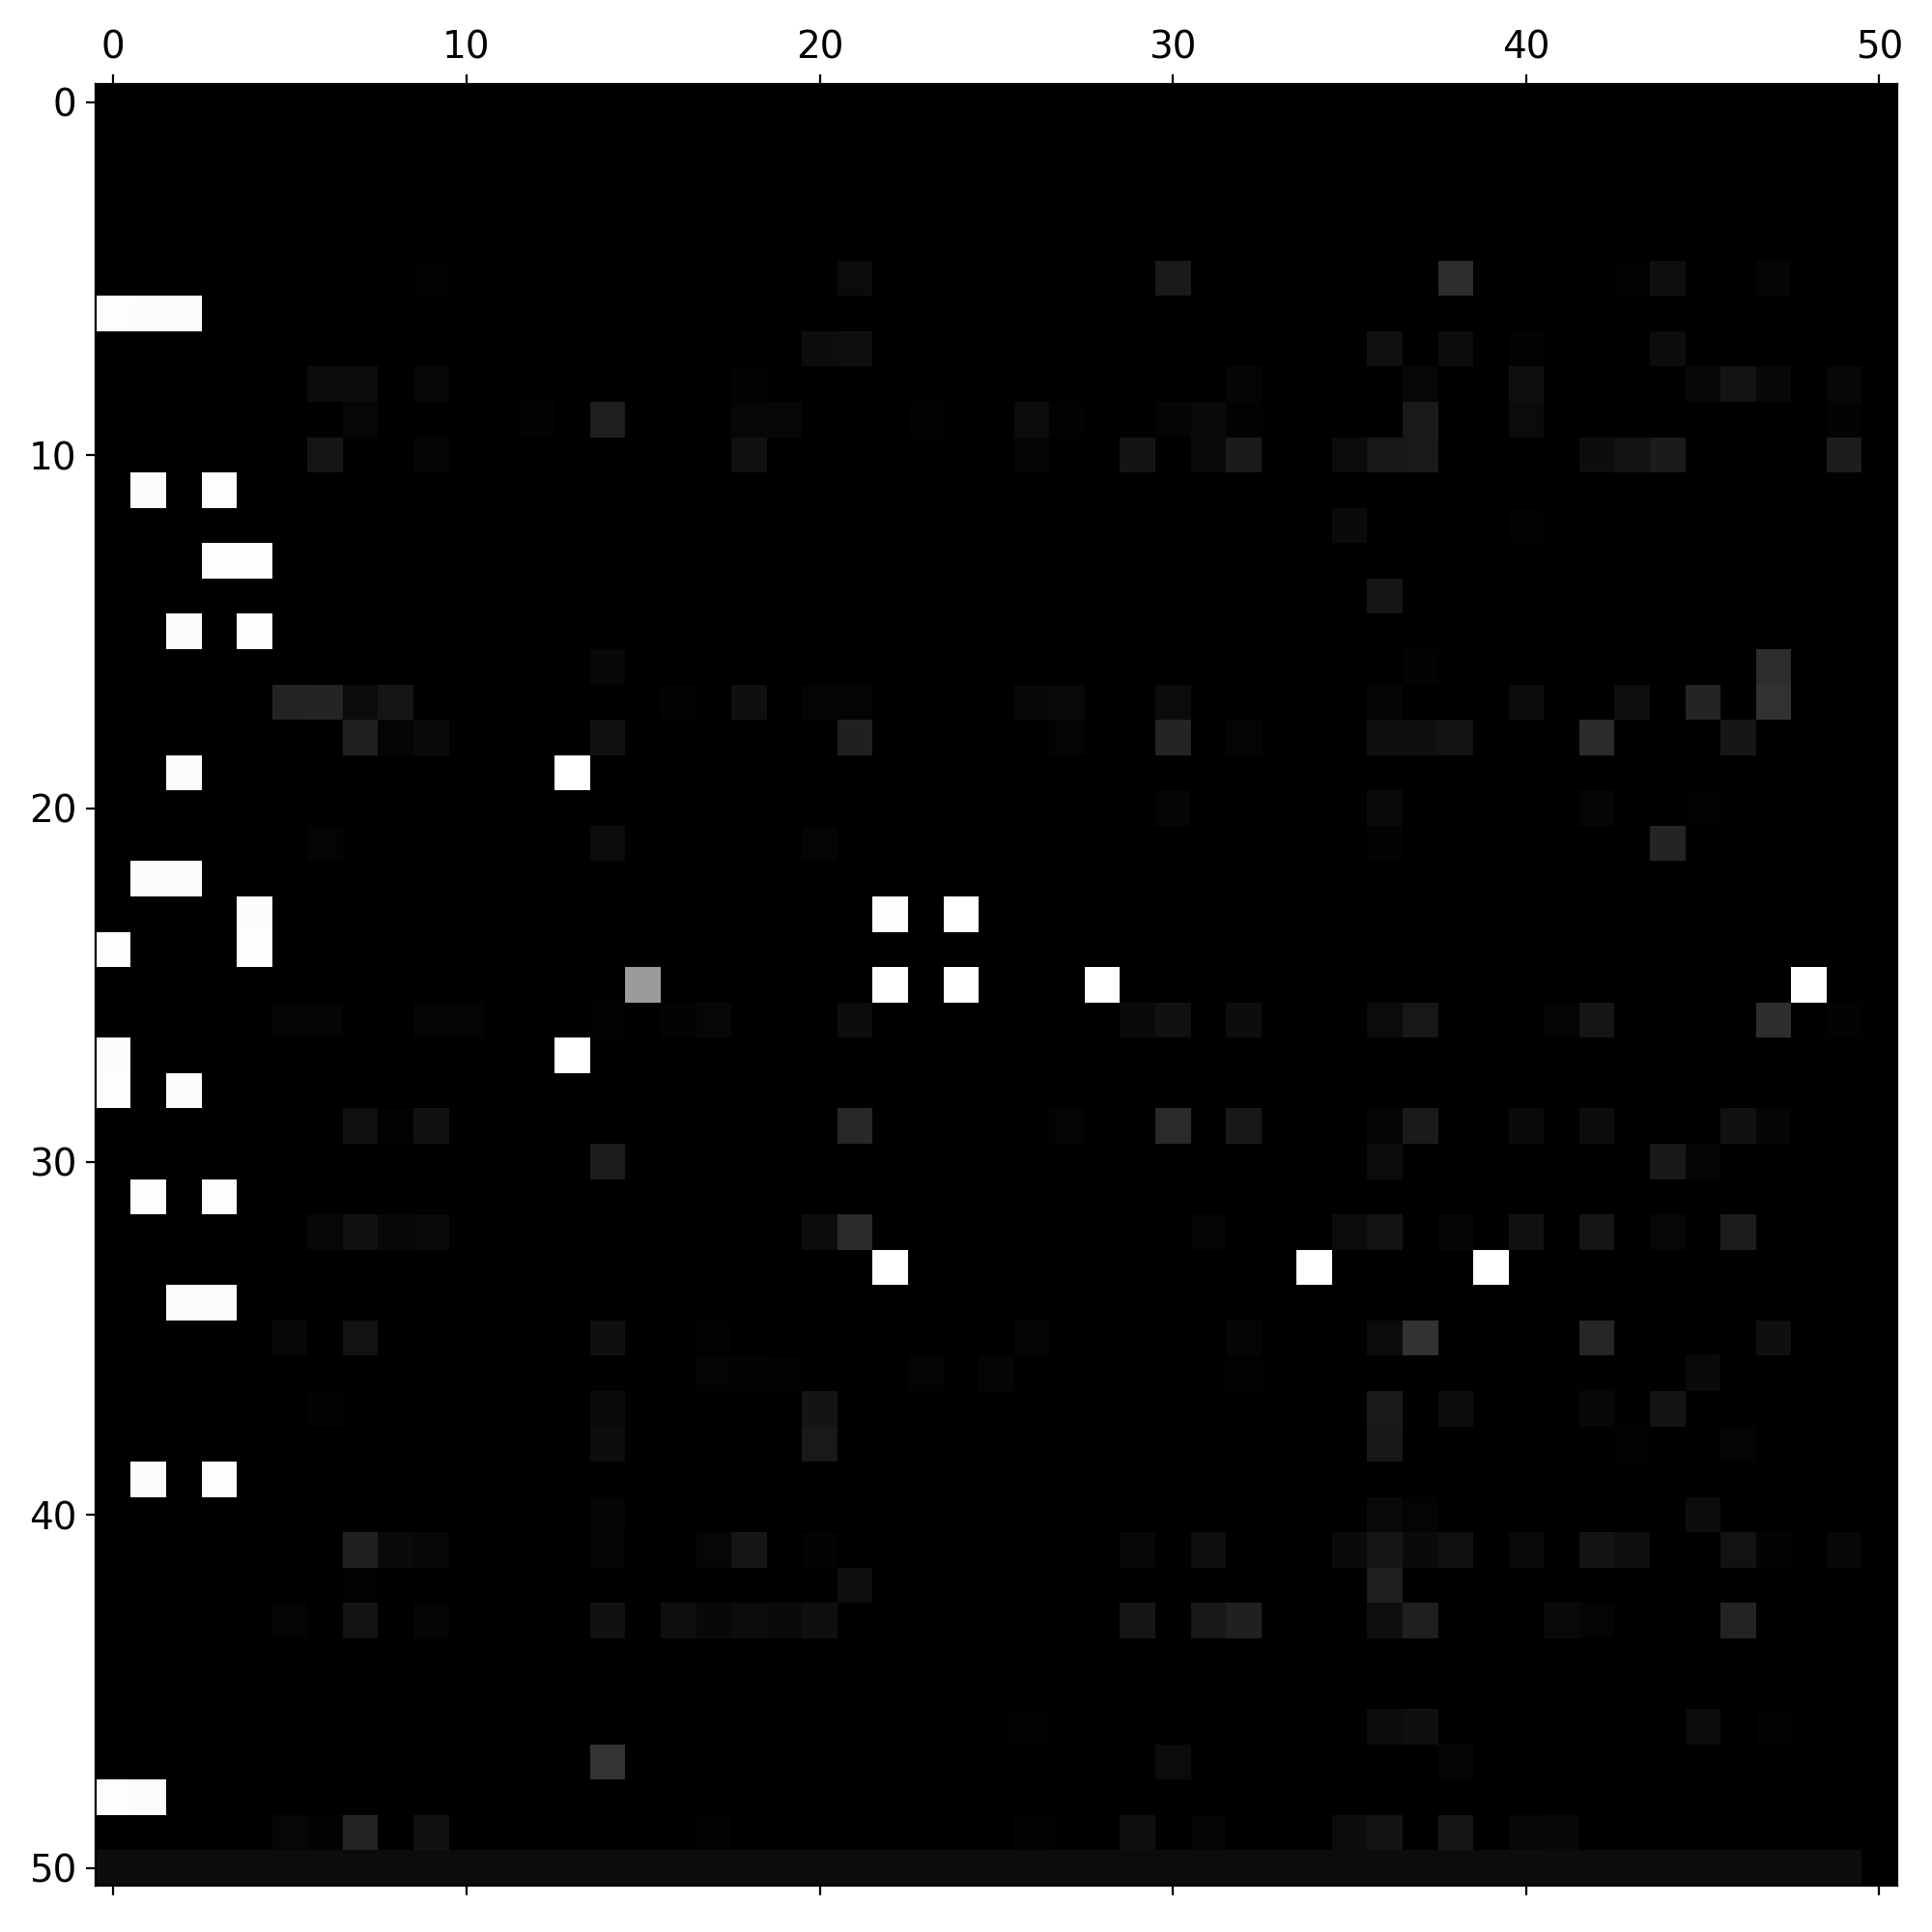

In [62]:
'wide'
direc = './data/2020-11-19--09:52--58'
file_names = sorted(all_files_from_dir(direc))
plt.ion()
fig, ax = plt.subplots(1, 1, figsize=(10, 10), tight_layout=True)

for i_f in range(0, len(file_names), 10):
    file = file_names[i_f]
    loaded = sio.loadmat(os.path.join(direc, file))
    graph_weight_matrix(loaded['w_r_e'], '', ax=ax, v_max=0.26*0.004 / 5)
    fig.canvas.draw()
    time.sleep(0.0001)
    
    if i_f == len(file_names) - 1:
        w_r = loaded['w_r_e']

<IPython.core.display.Javascript object>


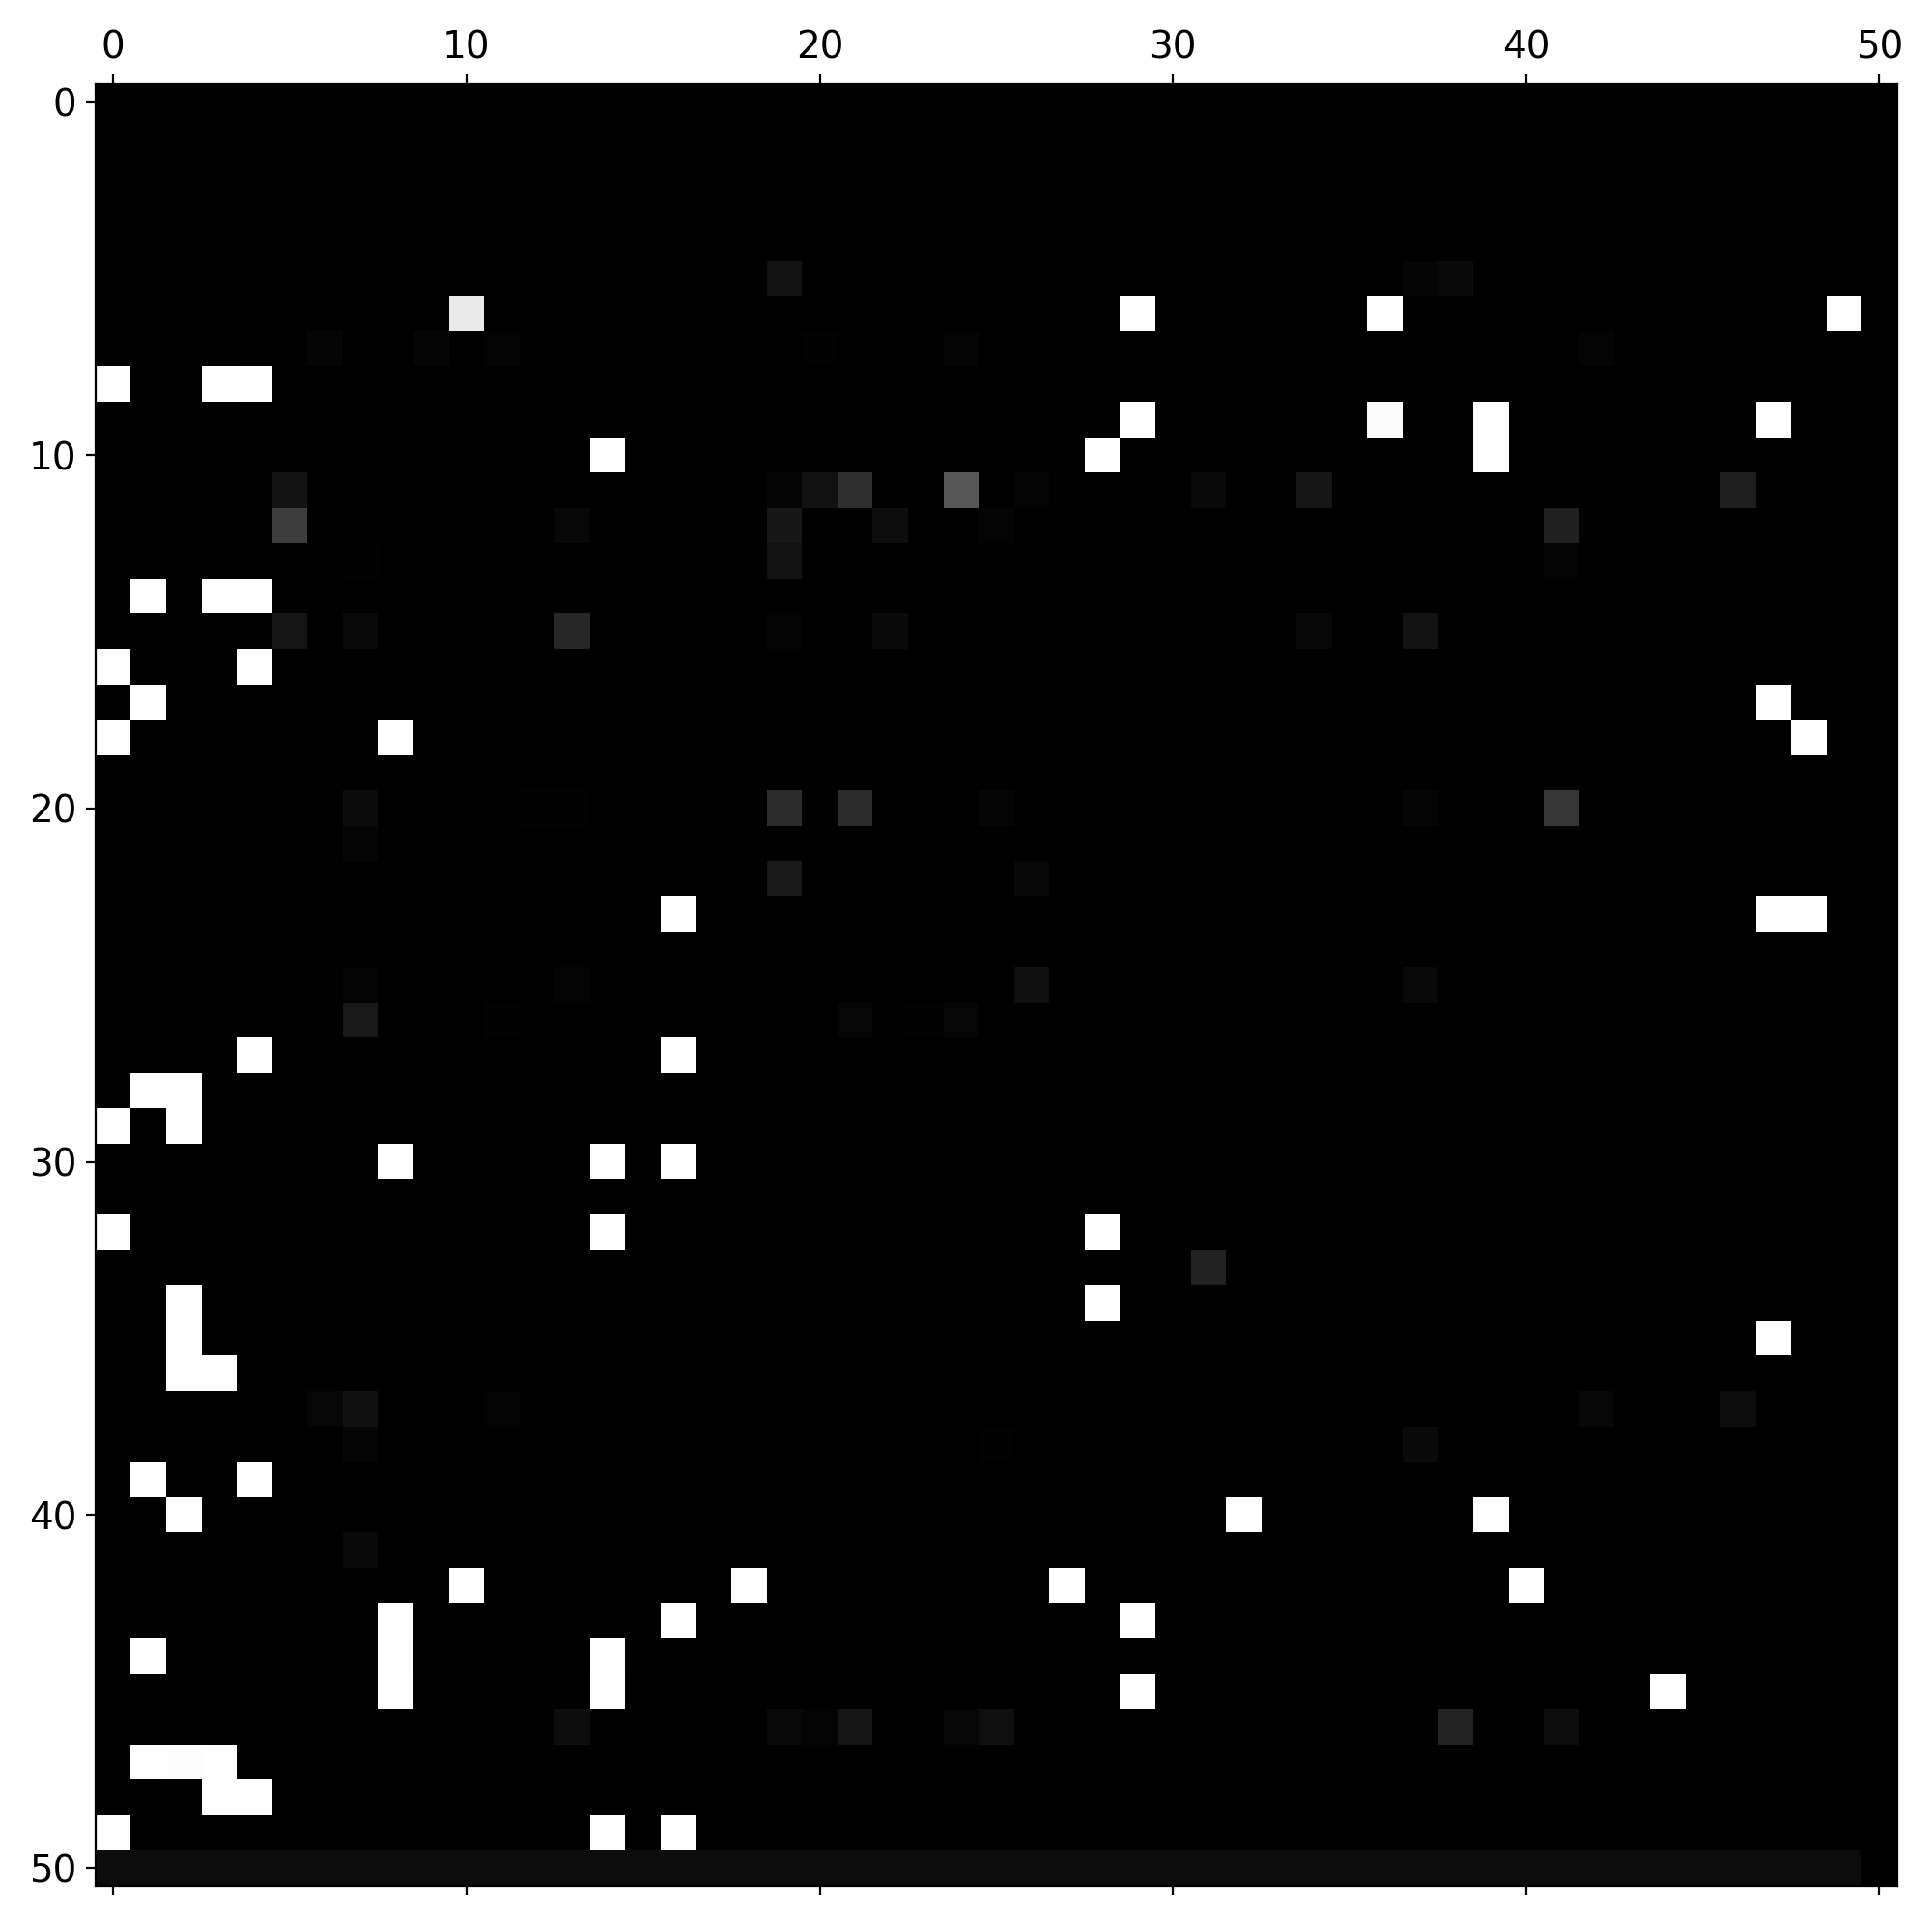

In [70]:
'wide'
direc = './data/2020-11-19--10:18--23'
file_names = sorted(all_files_from_dir(direc))
plt.ion()
fig, ax = plt.subplots(1, 1, figsize=(10, 10), tight_layout=True)

for i_f in range(0, len(file_names), 10):
    file = file_names[i_f]
    loaded = sio.loadmat(os.path.join(direc, file))
    graph_weight_matrix(loaded['w_r_e'], '', ax=ax, v_max=0.26*0.004 / 5)
    fig.canvas.draw()
    time.sleep(0.0001)
    
    if i_f == len(file_names) - 1:
        w_r = loaded['w_r_e']

<IPython.core.display.Javascript object>


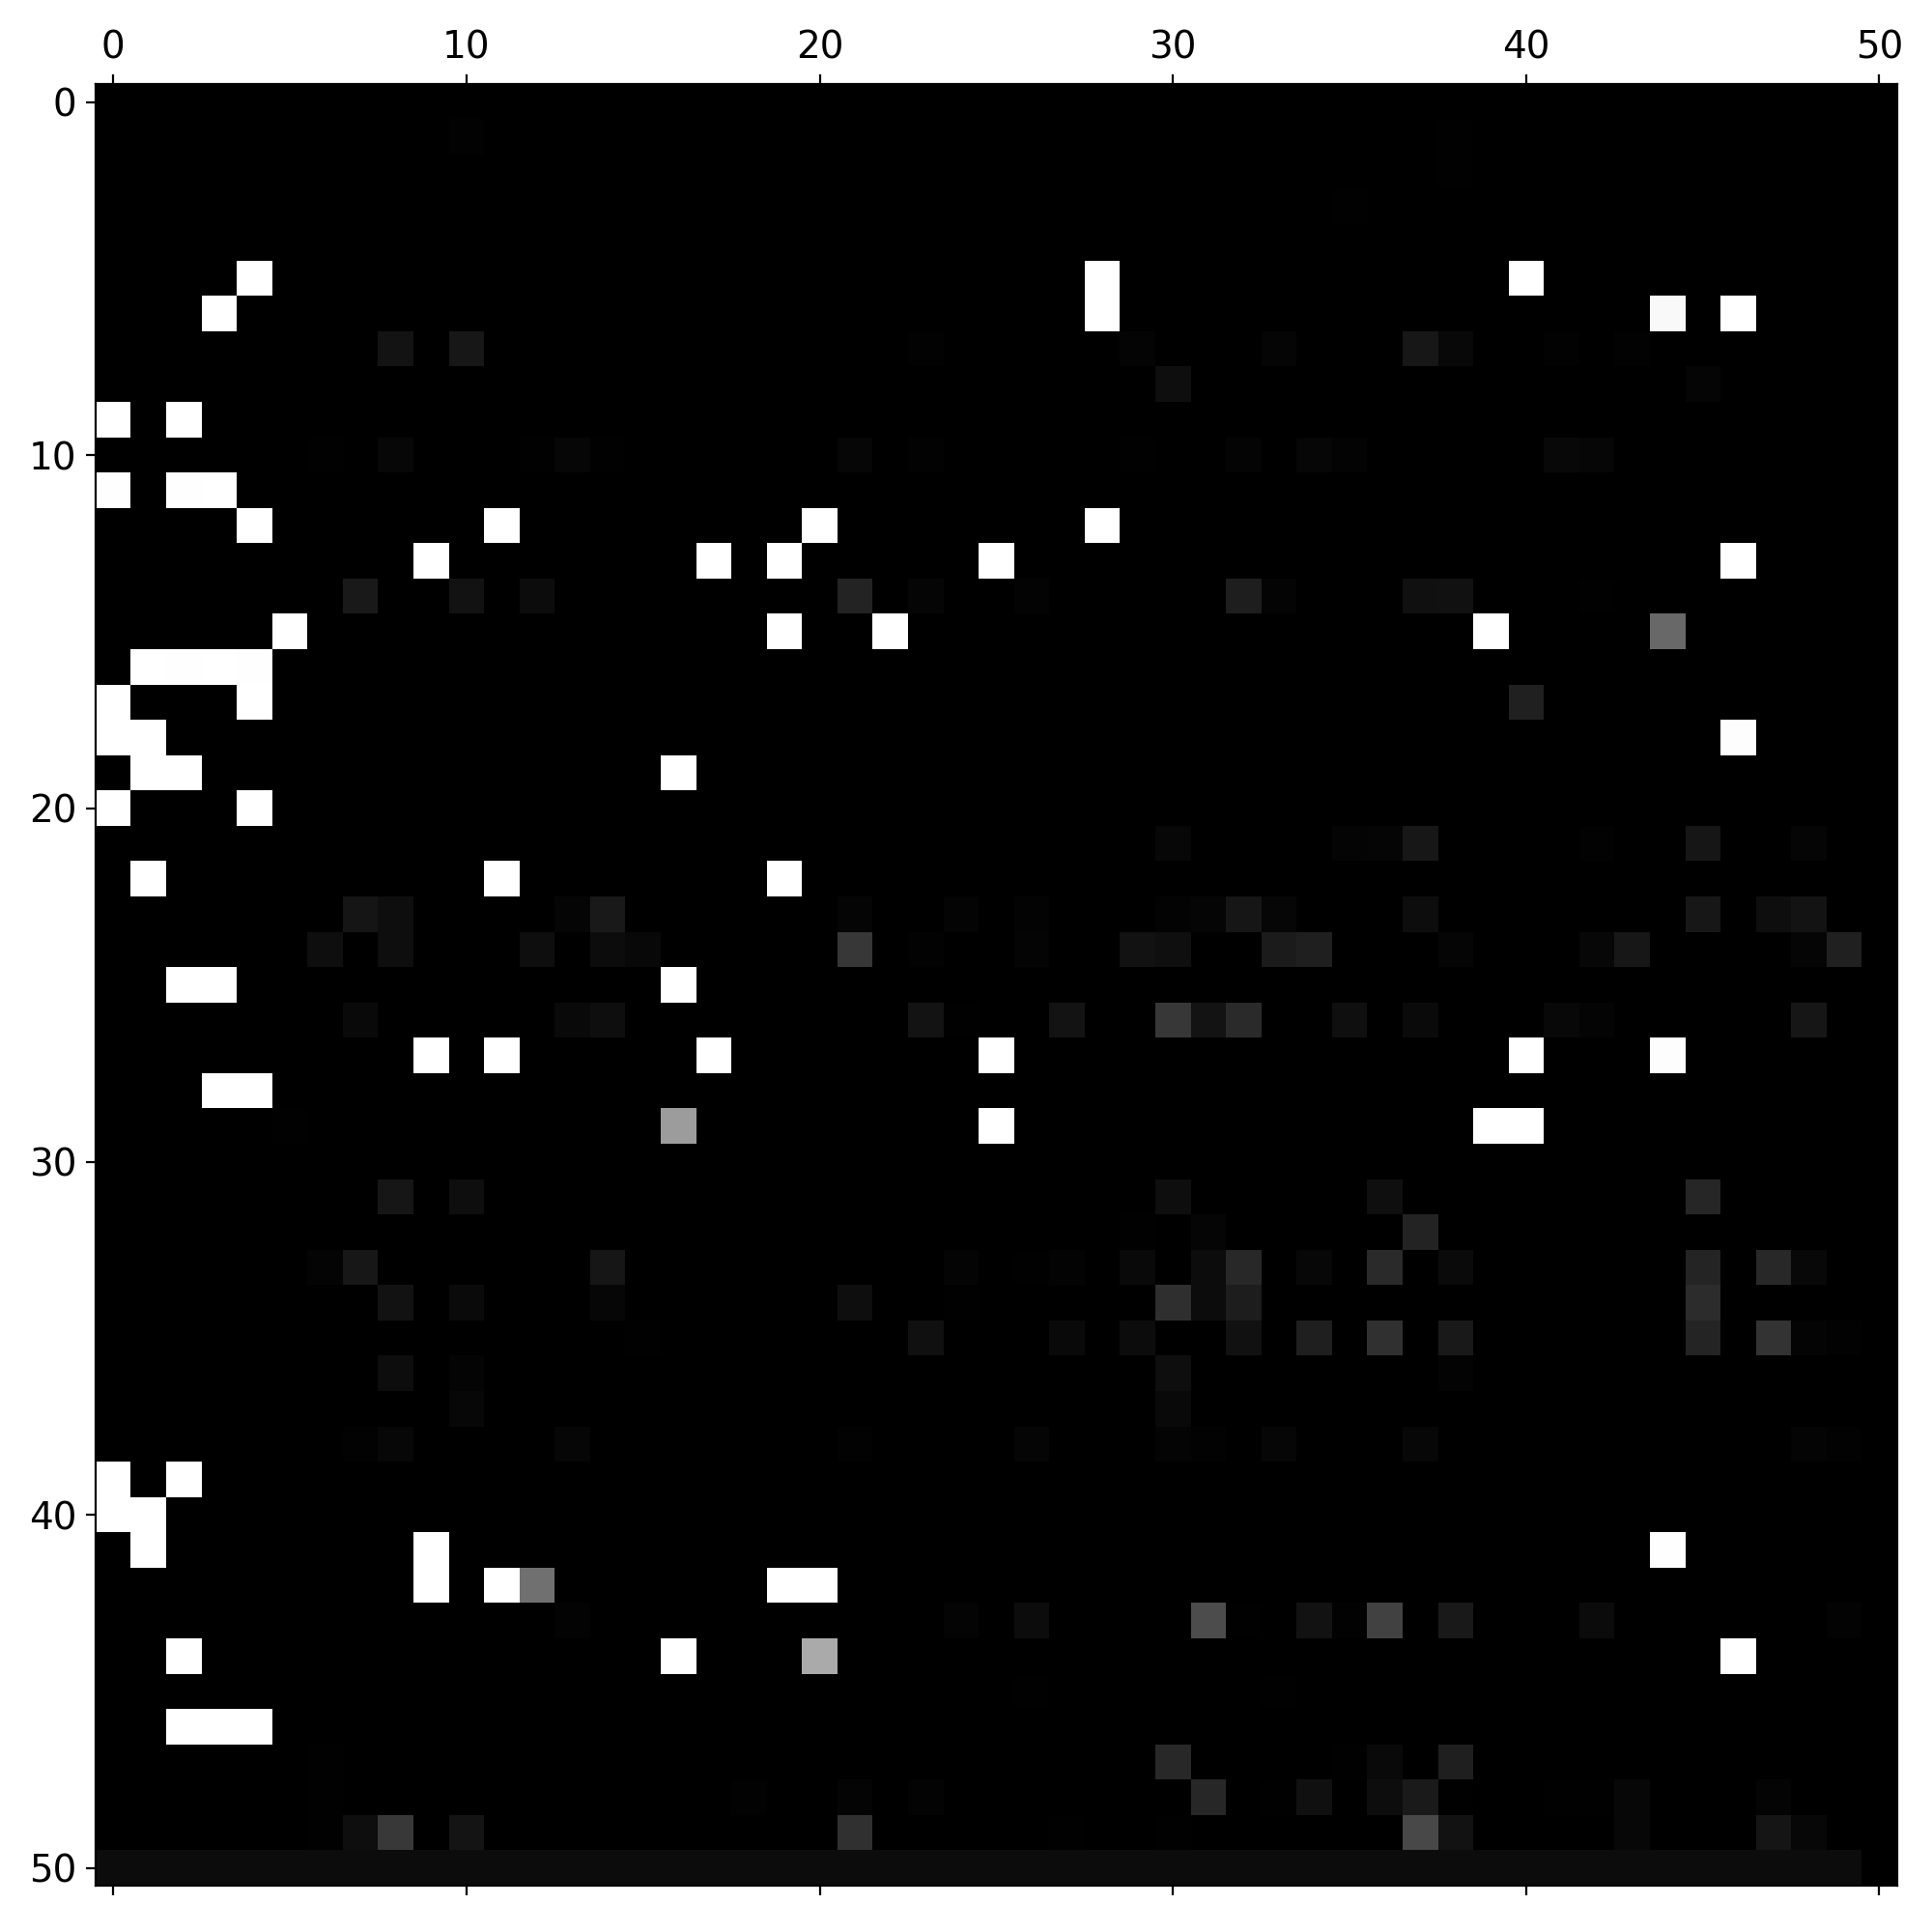

In [74]:
'wide'
direc = './data/2020-11-19--10:38--44'
file_names = sorted(all_files_from_dir(direc))
plt.ion()
fig, ax = plt.subplots(1, 1, figsize=(10, 10), tight_layout=True)

for i_f in range(0, len(file_names), 10):
    file = file_names[i_f]
    loaded = sio.loadmat(os.path.join(direc, file))
    graph_weight_matrix(loaded['w_r_e'], '', ax=ax, v_max=0.26*0.004 / 5)
    fig.canvas.draw()
    time.sleep(0.0001)
    
    if i_f == len(file_names) - 1:
        w_r = loaded['w_r_e']

<IPython.core.display.Javascript object>


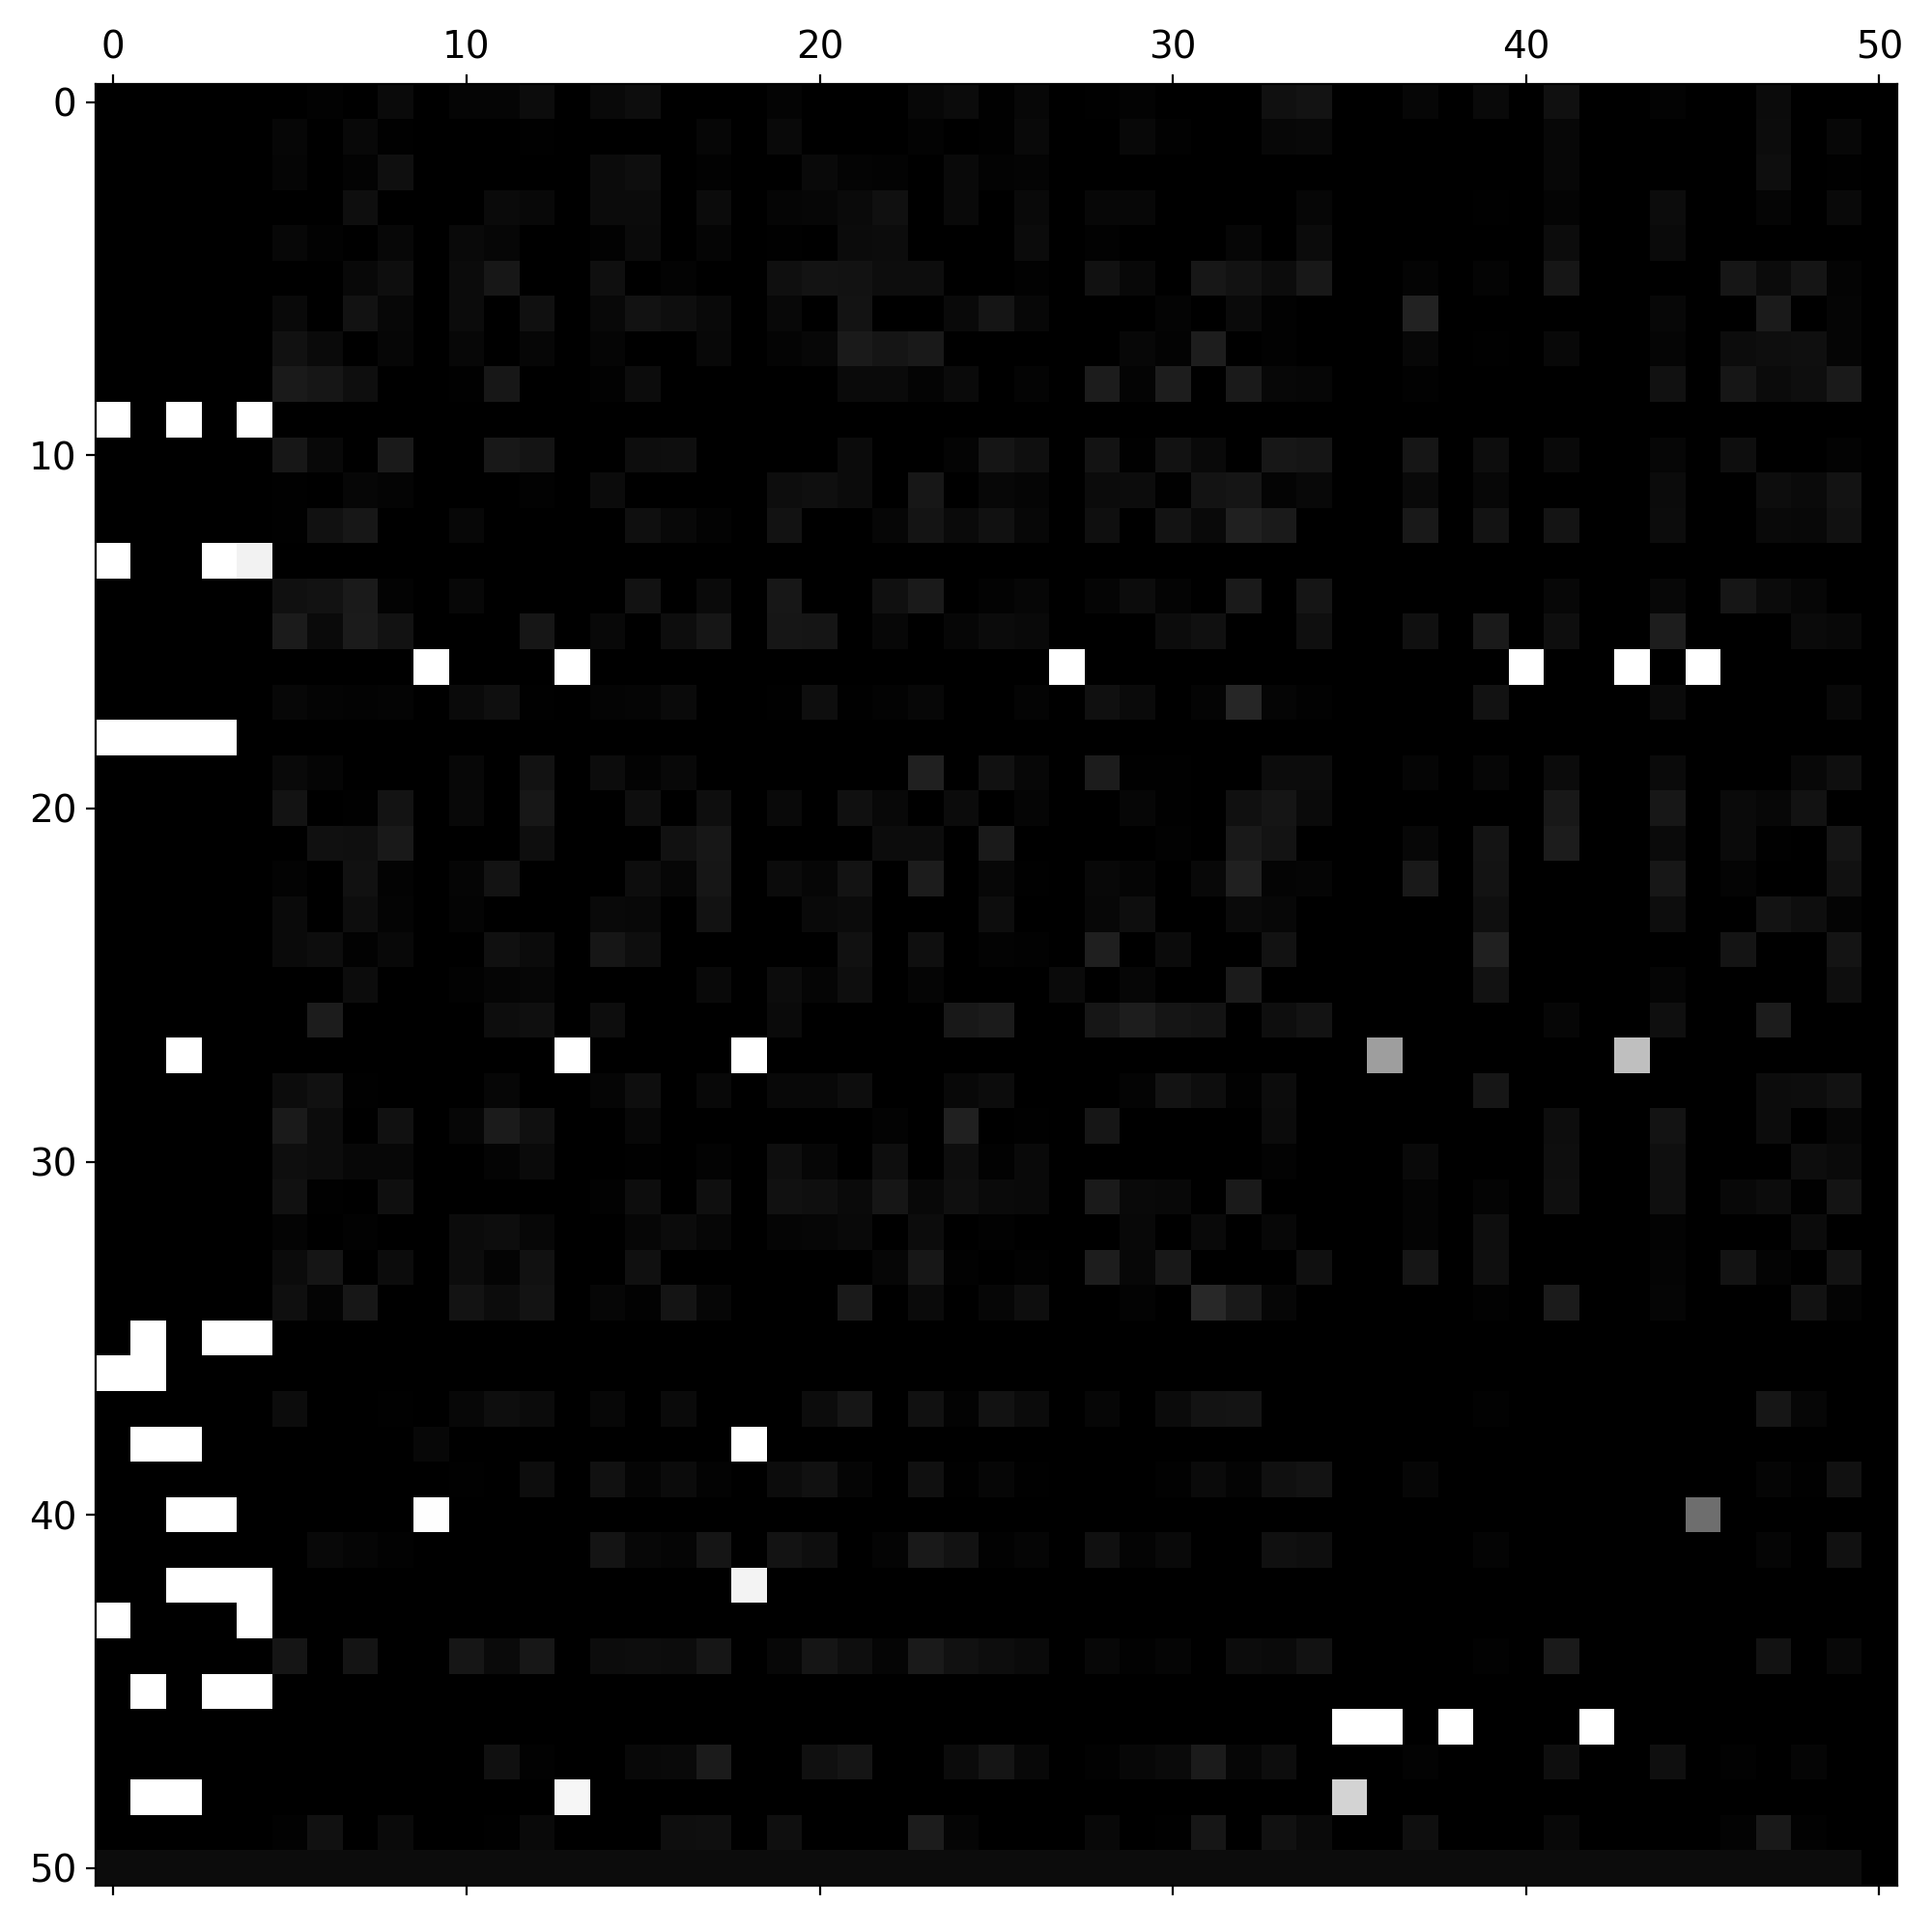

In [78]:
'wide'
direc = './data/2020-11-19--10:57--53'
file_names = sorted(all_files_from_dir(direc))
plt.ion()
fig, ax = plt.subplots(1, 1, figsize=(10, 10), tight_layout=True)

for i_f in range(0, len(file_names), 10):
    file = file_names[i_f]
    loaded = sio.loadmat(os.path.join(direc, file))
    graph_weight_matrix(loaded['w_r_e'], '', ax=ax, v_max=0.26*0.004 / 5)
    fig.canvas.draw()
    time.sleep(0.0001)
    
    if i_f == len(file_names) - 1:
        w_r = loaded['w_r_e']